# Arbaz Khan
## 2020076
***

* ### Task 1

In [318]:
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [319]:
#Fetching data from the file
with open('Sample data-1-IRIS-1.txt', 'r') as file:
    
    rows = int(file.readline())
    columns = int(file.readline())
    next(file)
    data = []
    for line in file:
        values = line.split('\t')
        values = filter(lambda x: x.strip(), values)
        row = list(map(float, values))
        data.append(row)

data = np.array(data)

In [320]:
#Function to calculate Pearson’s correlation coefficient 
def coefficient_calculator(x, y):
    x_sum = sum(x)
    x_len = len(x)
    y_sum = sum(y)
    y_len = len(y)
    x_mean = x_sum/x_len
    y_mean = y_sum/y_len
    
    num_values = []
    
    for i,j in zip(x,y):
        i = i-x_mean
        j = j-y_mean
        z = i*j
        num_values.append(z)
        
    numerator = sum(num_values)
    
    a = []
    b = []
    
    for i,j in zip(x,y):
        i = (i-x_mean)**2
        j = (j-y_mean)**2
        
        a.append(i)
        b.append(j)
    
    denominator = math.sqrt(sum(a) * sum(b))
    
    return (numerator/denominator)

In [321]:
#Constructing correlation matrix
correlation_matrix = []

for i in range(len(data)):
    pc_coefficients = []
    for j in range(len(data)):
        pc_coefficients.append(coefficient_calculator(data[i], data[j]))          
    correlation_matrix.append(pc_coefficients) 

correlation_matrix = np.array(correlation_matrix)
correlation_matrix

array([[1.        , 0.99599866, 0.99997391, ..., 0.65347343, 0.6339168 ,
        0.63315839],
       [0.99599866, 1.        , 0.99660709, ..., 0.70898277, 0.68625679,
        0.68483481],
       [0.99997391, 0.99660709, 1.        , ..., 0.65755616, 0.63763128,
        0.6368058 ],
       ...,
       [0.65347343, 0.70898277, 0.65755616, ..., 1.        , 0.99570813,
        0.99446012],
       [0.6339168 , 0.68625679, 0.63763128, ..., 0.99570813, 1.        ,
        0.99991588],
       [0.63315839, 0.68483481, 0.6368058 , ..., 0.99446012, 0.99991588,
        1.        ]])

In [322]:
#Discretize:
discrete_matrix = np.copy(correlation_matrix)
column_means = np.mean(discrete_matrix, axis = 0)
for i in range(len(discrete_matrix)):
    for j in range(len(discrete_matrix)):
        if(discrete_matrix[i][j] < column_means[j]):
            discrete_matrix[i][j] = 0
        else:
            discrete_matrix[i][j] = 1

discrete_matrix = discrete_matrix.astype(int)
discrete_matrix

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [323]:
plot = px.imshow(discrete_matrix, binary_string = True)
plot.show(config = {'scrollZoom': True})

In [324]:
#Colorize:
color_matrix = np.copy(correlation_matrix)
column_max = np.max(color_matrix, axis = 0)
for i in range(len(color_matrix)):
    for j in range(len(color_matrix)):
            color_matrix[i][j] = ((color_matrix[i][j]/column_max[j])*255)

color_matrix

array([[255.        , 253.97965862, 254.99334732, ..., 166.63572491,
        161.64878423, 161.45538965],
       [253.97965862, 255.        , 254.13480685, ..., 180.79060711,
        174.9954812 , 174.63287614],
       [254.99334732, 254.13480685, 255.        , ..., 167.6768204 ,
        162.59597629, 162.38547938],
       ...,
       [166.63572491, 180.79060711, 167.6768204 , ..., 255.        ,
        253.90557203, 253.58733089],
       [161.64878423, 174.9954812 , 162.59597629, ..., 253.90557203,
        255.        , 254.97854866],
       [161.45538965, 174.63287614, 162.38547938, ..., 253.58733089,
        254.97854866, 255.        ]])

In [325]:
plot = px.imshow(correlation_matrix, color_continuous_scale = "greens")
plot.show(config = {'scrollZoom': True})

* ### Task 2

In [326]:
#Permute data matrix
permuted_data = np.copy(data)
np.random.shuffle(permuted_data)
permuted_data

array([[5.2, 3.5, 1.5, 0.2],
       [7.2, 3.6, 6.1, 2.5],
       [6. , 2.2, 5. , 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6. , 3.4, 4.5, 1.6],
       [5.1, 2.5, 3. , 1.1],
       [4.8, 3.1, 1.6, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [5.8, 2.7, 5.1, 1.9],
       [5.2, 2.7, 3.9, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [4.6, 3.2, 1.4, 0.2],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 4.7, 1.5],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 2.5, 5.8, 1.8],
       [6.4, 2.7, 5.3, 1.9],
       [7.7, 2.8, 6.7, 2. ],
       [6.2, 2.9, 4.3, 1.3],
       [5.4, 3. , 4.5, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.1, 3.3, 1.7, 0.5],
       [5.1, 3.5, 1.4, 0.2],
       [6.5, 3. , 5.5, 1.8],
       [6.5, 3. , 5.2, 2. ],
       [5.4, 3.9, 1.7, 0.4],
       [6.7, 3.1, 5.6, 2.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.5, 2.4, 3.8, 1.1],
       [5. , 3. , 1.6, 0.2],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [7.1, 3

In [327]:
#Constructing correlation matrix
correlation_matrix_permuted = []

for i in range(len(permuted_data)):
    pc_coefficients = []
    for j in range(len(permuted_data)):
        pc_coefficients.append(coefficient_calculator(permuted_data[i], permuted_data[j]))          
    correlation_matrix_permuted.append(pc_coefficients) 

correlation_matrix_permuted = np.array(correlation_matrix_permuted)
correlation_matrix_permuted

array([[1.        , 0.6444283 , 0.59293241, ..., 0.81377604, 0.65249672,
        0.60425039],
       [0.6444283 , 1.        , 0.99690785, ..., 0.96641091, 0.99871841,
        0.99867071],
       [0.59293241, 0.99690785, 1.        , ..., 0.94994814, 0.99268338,
        0.99906918],
       ...,
       [0.81377604, 0.96641091, 0.94994814, ..., 1.        , 0.96509656,
        0.95249613],
       [0.65249672, 0.99871841, 0.99268338, ..., 0.96509656, 1.        ,
        0.99661854],
       [0.60425039, 0.99867071, 0.99906918, ..., 0.95249613, 0.99661854,
        1.        ]])

In [328]:
#Discretize:
discrete_matrix_permuted = np.copy(correlation_matrix_permuted)
column_means = np.mean(discrete_matrix_permuted, axis = 0)
for i in range(len(discrete_matrix_permuted)):
    for j in range(len(discrete_matrix_permuted)):
        if(discrete_matrix_permuted[i][j] < column_means[j]):
            discrete_matrix_permuted[i][j] = 0
        else:
            discrete_matrix_permuted[i][j] = 1

discrete_matrix_permuted = discrete_matrix_permuted.astype(int)
discrete_matrix_permuted

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1]])

In [329]:
plot = px.imshow(discrete_matrix_permuted, binary_string = True)
plot.show(config = {'scrollZoom': True})

In [330]:
#Caluculating signatures for each row
row_sum = np.sum(permuted_data, axis = 1).tolist()
row_mean = np.mean(permuted_data, axis = 1).tolist()
signatures = []

for i, j in zip(row_sum, row_mean):
    signatures.append(i*j)
    
signatures

[27.039999999999992,
 94.08999999999999,
 54.022499999999994,
 51.1225,
 60.0625,
 34.2225,
 23.522499999999997,
 44.89,
 60.0625,
 43.56000000000001,
 50.41,
 22.089999999999993,
 76.5625,
 64.0,
 61.62250000000001,
 70.56,
 66.4225,
 92.16,
 54.022499999999994,
 51.84,
 61.622499999999995,
 28.622500000000006,
 28.08999999999999,
 26.009999999999998,
 70.56,
 69.7225,
 32.49,
 79.21000000000001,
 58.522499999999994,
 40.959999999999994,
 24.009999999999994,
 31.359999999999996,
 28.622499999999995,
 81.90250000000002,
 81.90250000000002,
 83.72250000000001,
 93.1225,
 60.84000000000001,
 33.0625,
 59.290000000000006,
 61.62250000000001,
 20.702499999999997,
 40.96000000000001,
 68.88999999999999,
 25.502499999999998,
 55.50250000000002,
 23.04,
 24.999999999999993,
 57.76,
 33.0625,
 101.00250000000001,
 53.29,
 29.7025,
 73.96000000000002,
 70.55999999999997,
 95.06250000000003,
 31.359999999999996,
 46.92249999999999,
 28.622499999999988,
 61.622500000000024,
 23.03999999999999,
 7

In [331]:
#Sorting data matrix according to signatures

sort_indices = np.argsort(signatures)

permuted_data = permuted_data[sort_indices]

permuted_data

array([[4.5, 2.3, 1.3, 0.3],
       [4.3, 3. , 1.1, 0.1],
       [4.4, 3. , 1.3, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.6, 3.2, 1.4, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.8, 3. , 1.4, 0.3],
       [5. , 3.2, 1.2, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [4.9, 3.1, 1.5, 0.1],
       [4.9, 3.1, 1.5, 0.1],
       [4.8, 3.1, 1.6, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.2, 3.4, 1.4, 0.2],
       [5.1, 3.5, 1.4, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.5, 3.5, 1.3, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.1, 3

In [332]:
#Constructing correlation matrix
correlation_matrix_permuted = []

for i in range(len(permuted_data)):
    pc_coefficients = []
    for j in range(len(permuted_data)):
        pc_coefficients.append(coefficient_calculator(permuted_data[i], permuted_data[j]))          
    correlation_matrix_permuted.append(pc_coefficients) 

correlation_matrix_permuted = np.array(correlation_matrix_permuted)
correlation_matrix_permuted

array([[1.        , 0.97121507, 0.97804135, ..., 0.61421985, 0.77507737,
        0.72351807],
       [0.97121507, 1.        , 0.99919241, ..., 0.45726427, 0.6649542 ,
        0.60849865],
       [0.97804135, 0.99919241, 1.        , ..., 0.49262636, 0.6942597 ,
        0.63957119],
       ...,
       [0.61421985, 0.45726427, 0.49262636, ..., 1.        , 0.96358386,
        0.97547488],
       [0.77507737, 0.6649542 , 0.6942597 , ..., 0.96358386, 1.        ,
        0.99692653],
       [0.72351807, 0.60849865, 0.63957119, ..., 0.97547488, 0.99692653,
        1.        ]])

In [333]:
#Discretize:
discrete_matrix_permuted = np.copy(correlation_matrix_permuted)
column_means = np.mean(discrete_matrix_permuted, axis = 0)
for i in range(len(discrete_matrix_permuted)):
    for j in range(len(discrete_matrix_permuted)):
        if(discrete_matrix_permuted[i][j] < column_means[j]):
            discrete_matrix_permuted[i][j] = 0
        else:
            discrete_matrix_permuted[i][j] = 1

discrete_matrix_permuted = discrete_matrix_permuted.astype(int)
discrete_matrix_permuted

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [334]:
plot = px.imshow(discrete_matrix_permuted, binary_string = True)
plot.show(config = {'scrollZoom': True})

In [335]:
#Colorize:
color_matrix = np.copy(correlation_matrix_permuted)
column_max = np.max(color_matrix, axis = 0)
for i in range(len(color_matrix)):
    for j in range(len(color_matrix)):
            color_matrix[i][j] = ((color_matrix[i][j]/column_max[j])*255)

color_matrix

array([[255.        , 247.65984247, 249.40054337, ..., 156.62606173,
        197.6447284 , 184.49710723],
       [247.65984247, 255.        , 254.79406358, ..., 116.60238774,
        169.56332136, 155.16715461],
       [249.40054337, 254.79406358, 255.        , ..., 125.61972064,
        177.03622306, 163.0906539 ],
       ...,
       [156.62606173, 116.60238774, 125.61972064, ..., 255.        ,
        245.71388533, 248.7460941 ],
       [197.6447284 , 169.56332136, 177.03622306, ..., 245.71388533,
        255.        , 254.21626471],
       [184.49710723, 155.16715461, 163.0906539 , ..., 248.7460941 ,
        254.21626471, 255.        ]])

In [336]:
plot = px.imshow(color_matrix, color_continuous_scale = "greens")
plot.show(config = {'scrollZoom': True})

* ### Task 3

In [337]:
#Input threshold
threshold = float(input("Enter a value for threshold: "))

#Remove values below the threshold
for i in range(len(correlation_matrix_permuted)):
    for j in range(len(correlation_matrix_permuted)):
        if(correlation_matrix_permuted[i][j] < threshold):
            correlation_matrix_permuted[i][j] = 0

correlation_matrix_permuted

array([[1.        , 0.97121507, 0.97804135, ..., 0.        , 0.        ,
        0.        ],
       [0.97121507, 1.        , 0.99919241, ..., 0.        , 0.        ,
        0.        ],
       [0.97804135, 0.99919241, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.96358386,
        0.97547488],
       [0.        , 0.        , 0.        , ..., 0.96358386, 1.        ,
        0.99692653],
       [0.        , 0.        , 0.        , ..., 0.97547488, 0.99692653,
        1.        ]])

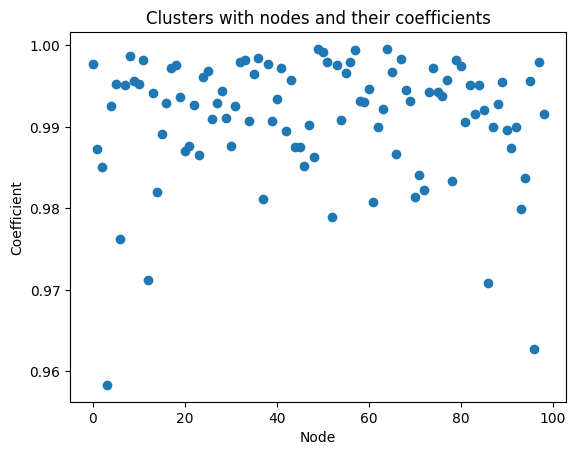

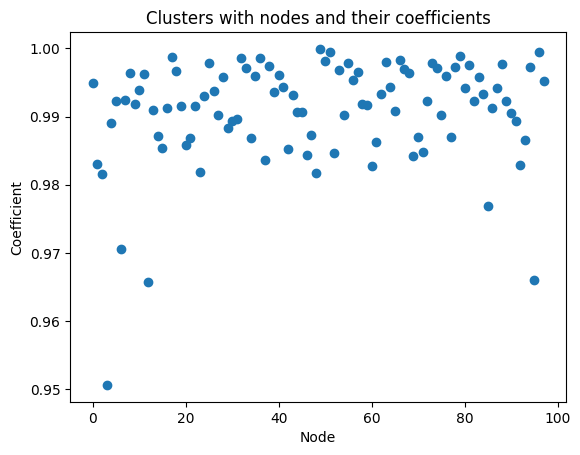

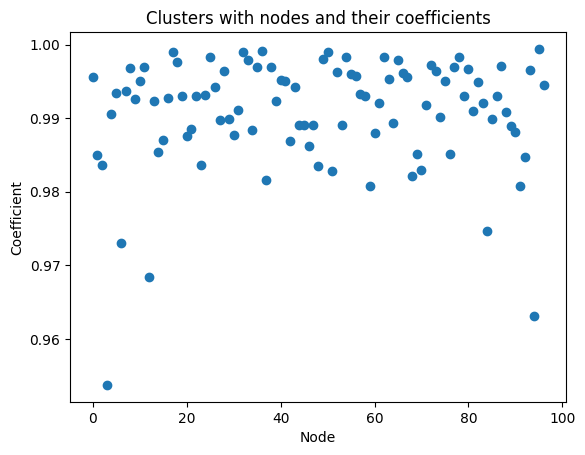

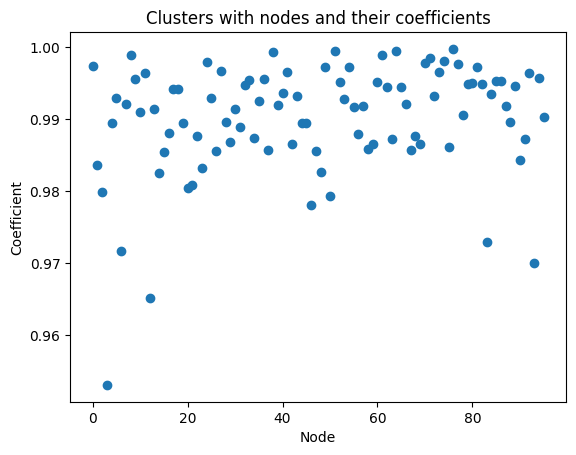

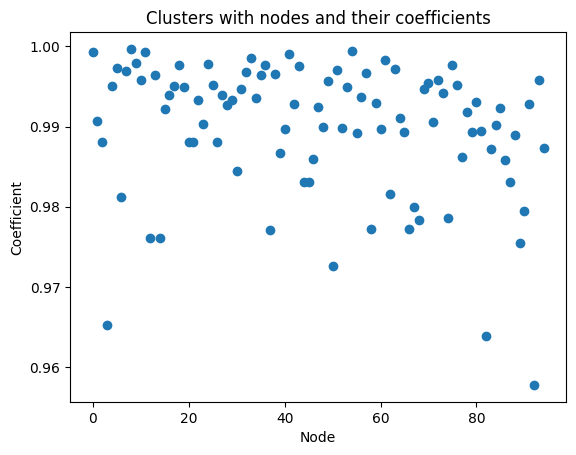

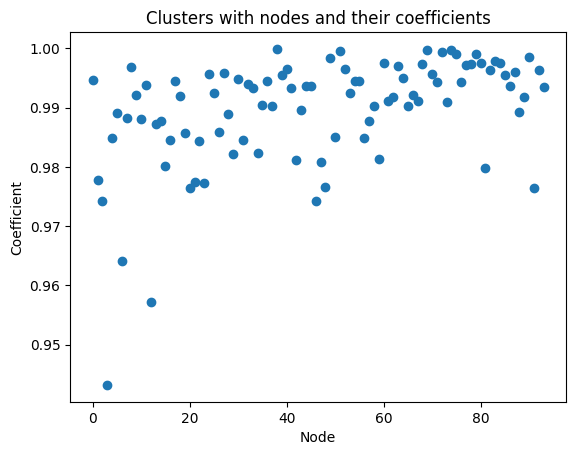

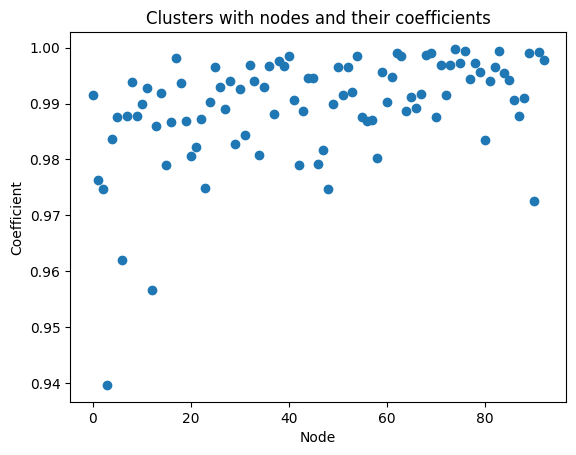

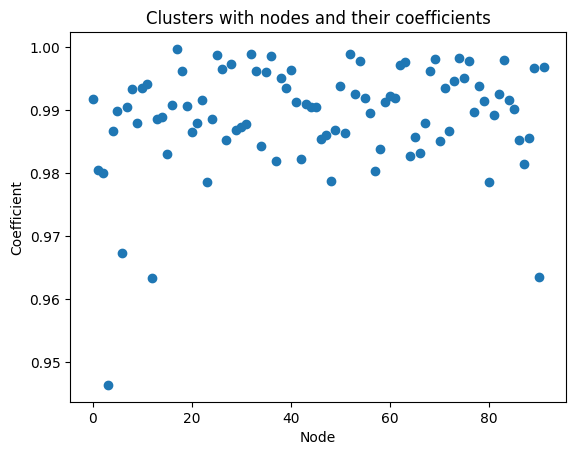

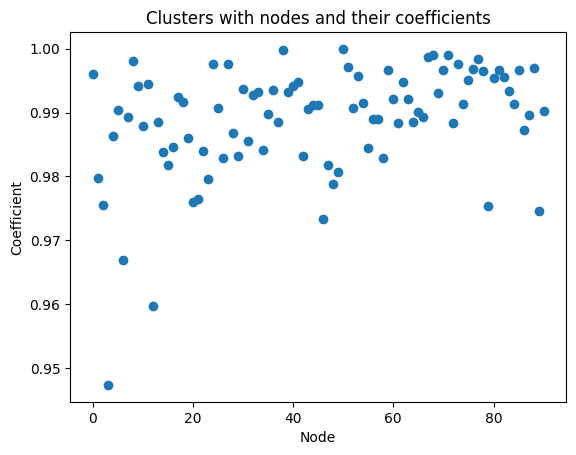

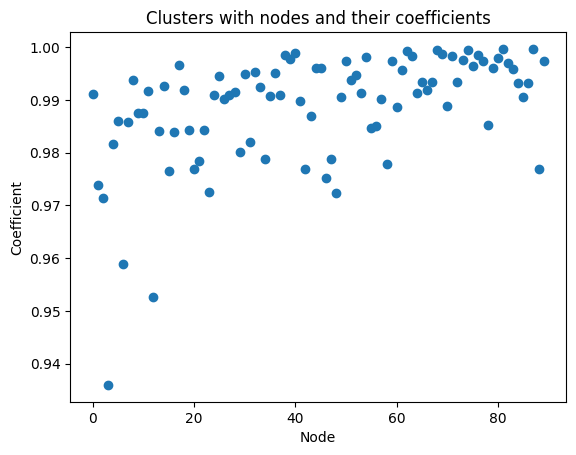

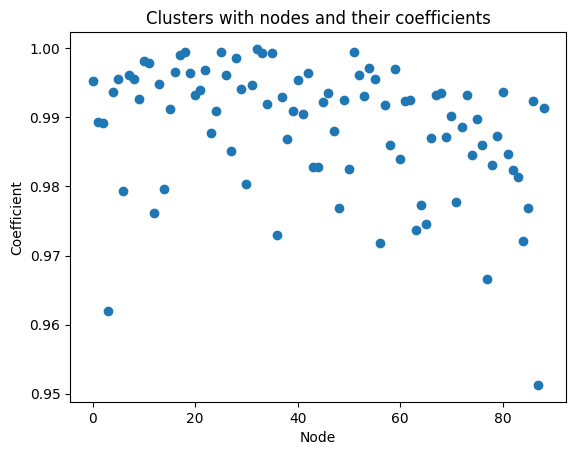

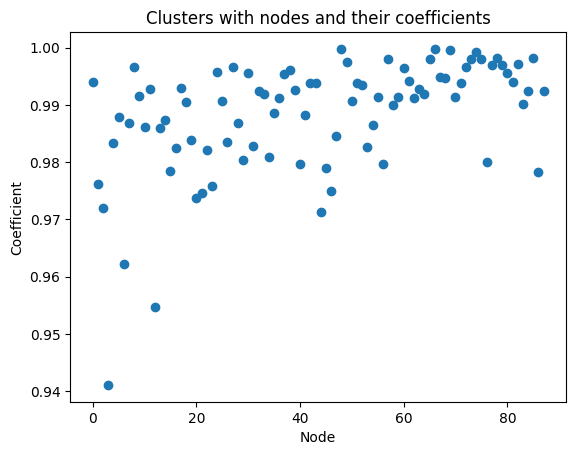

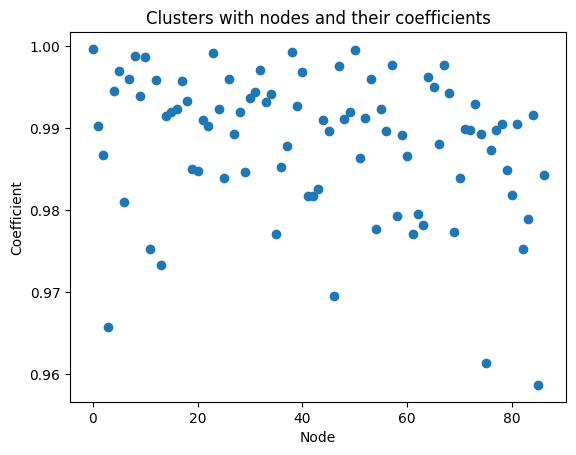

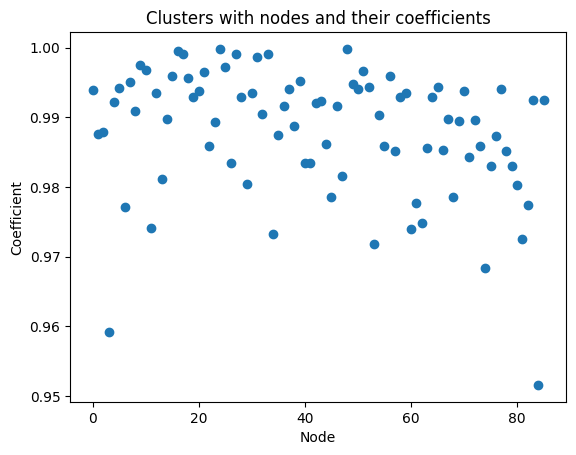

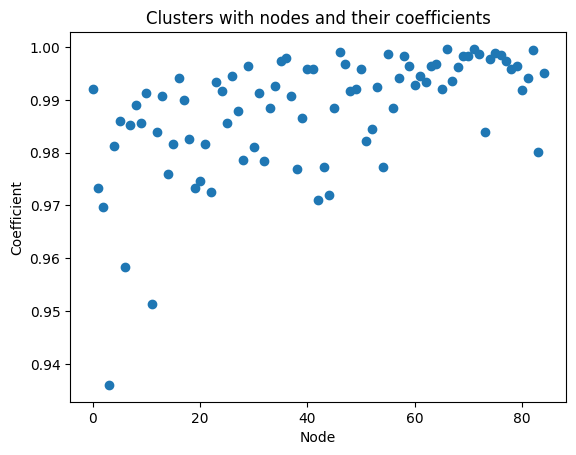

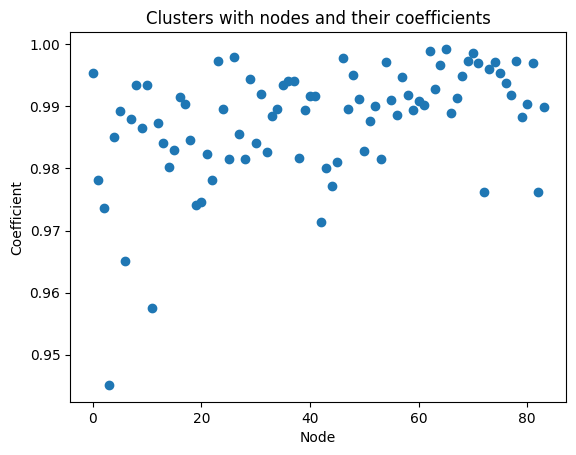

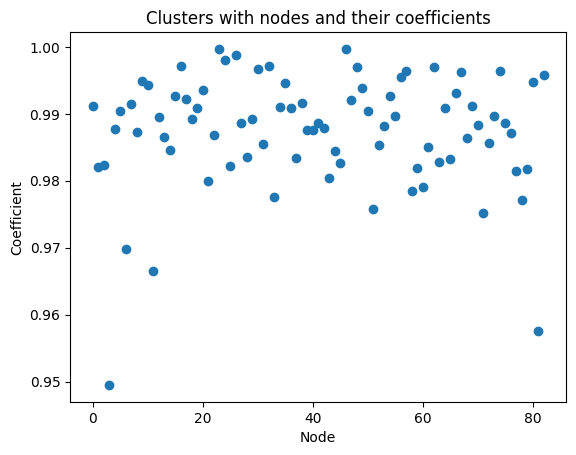

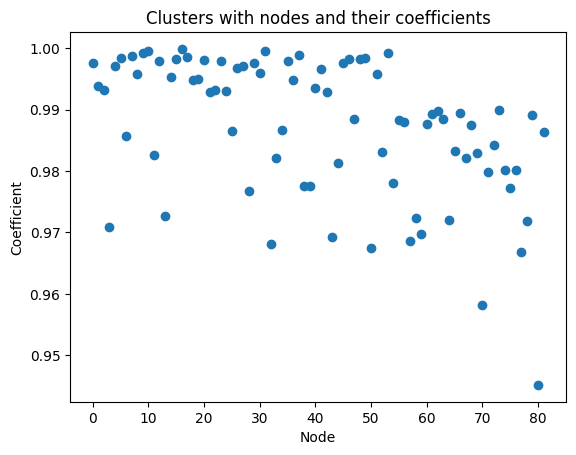

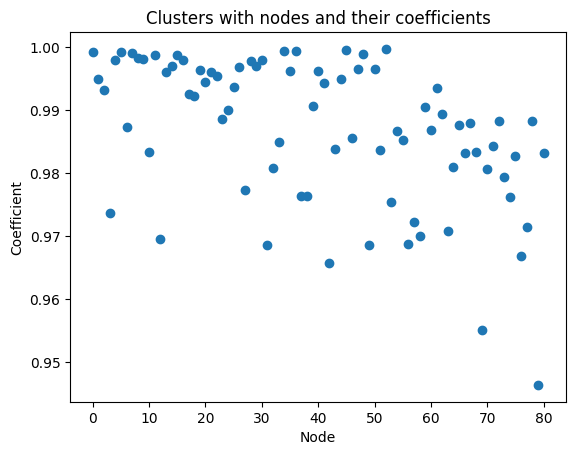

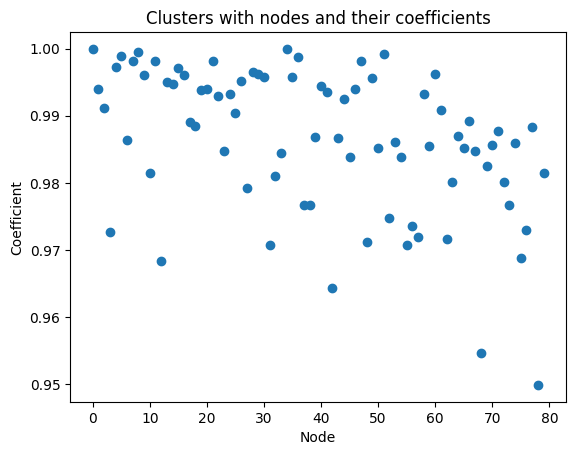

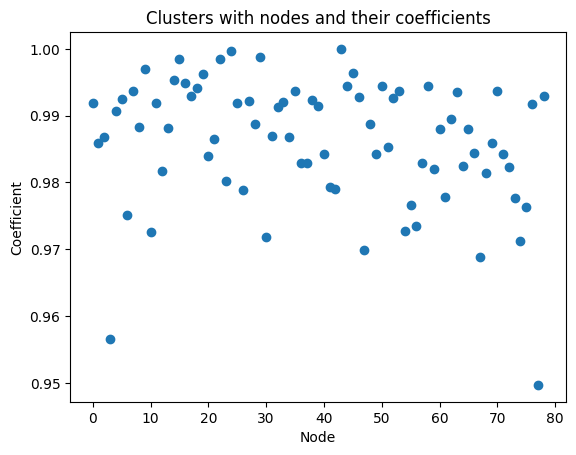

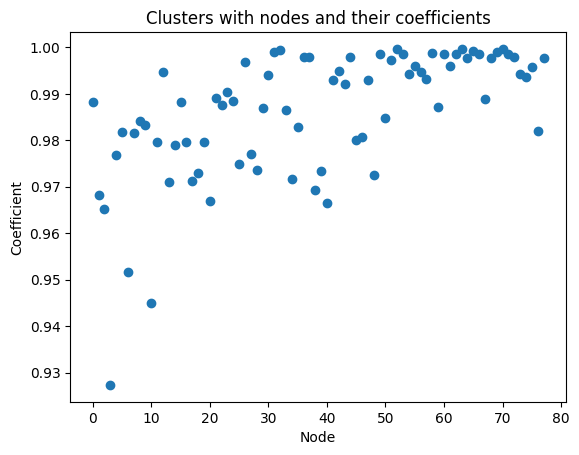

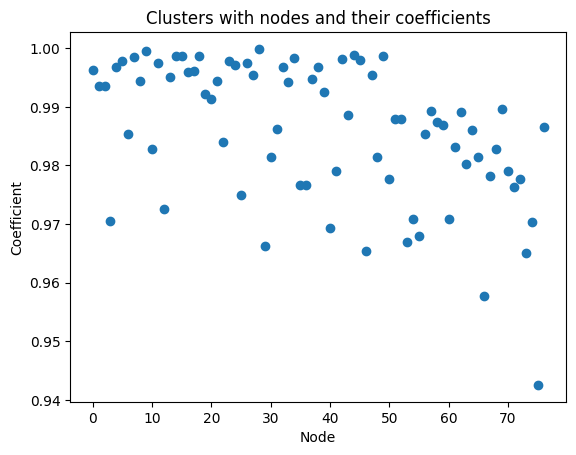

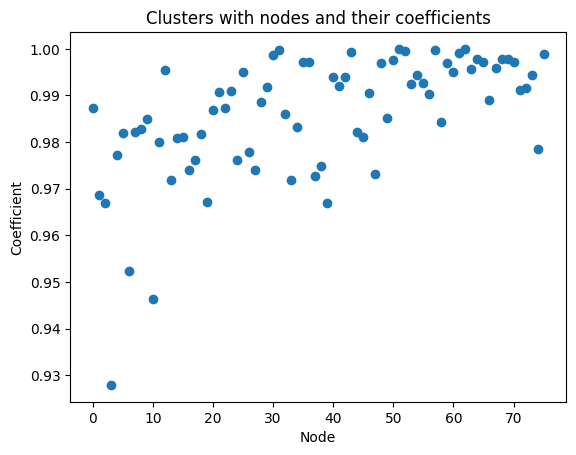

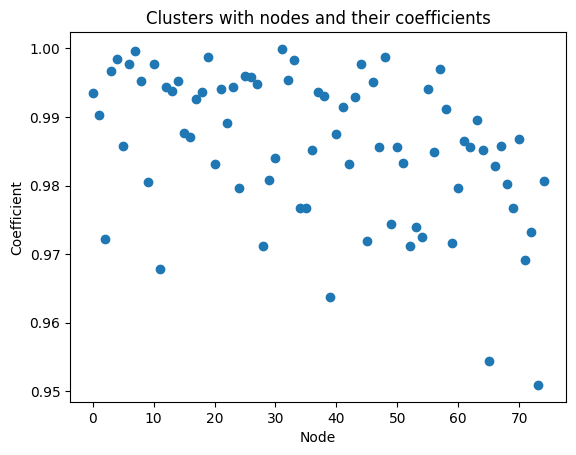

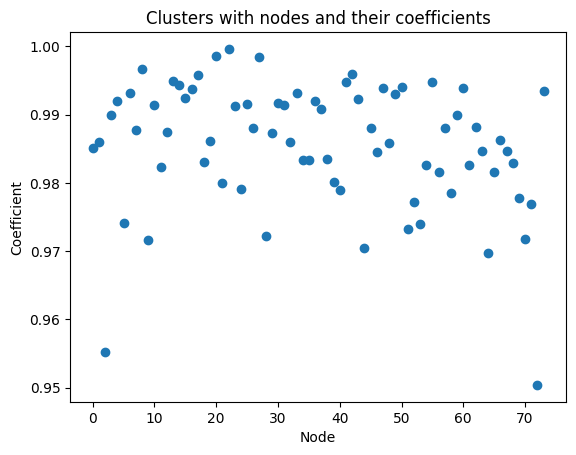

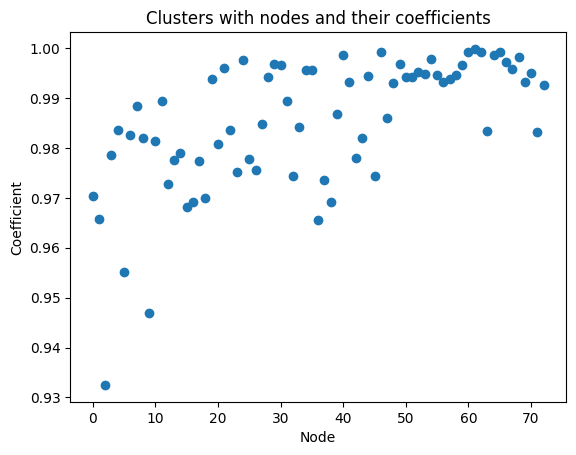

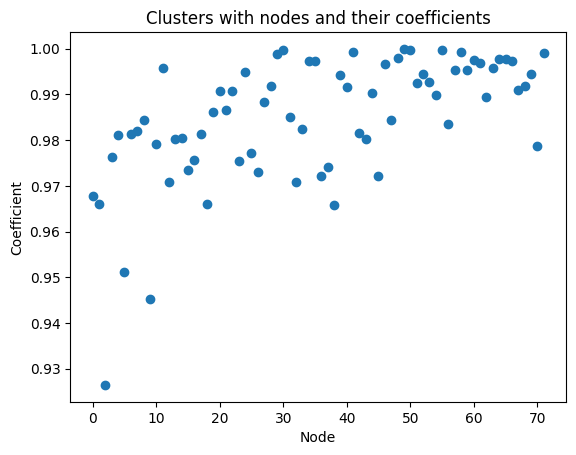

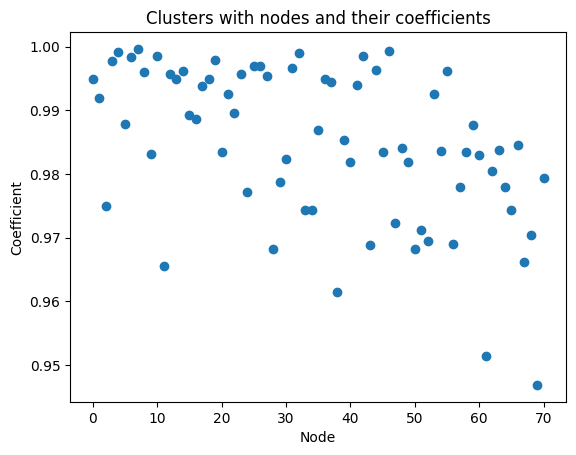

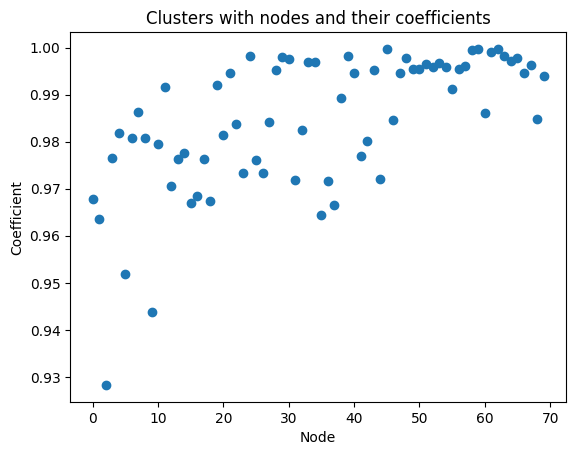

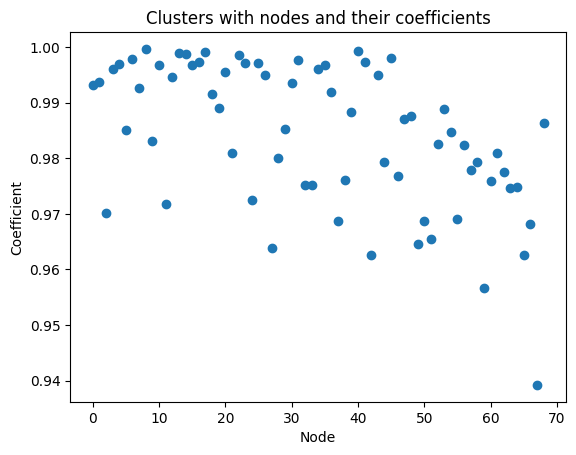

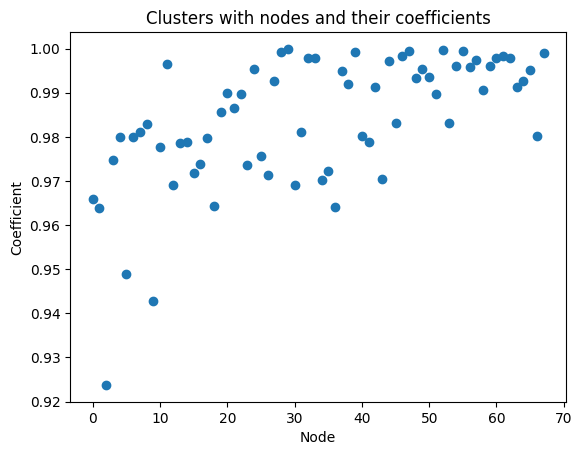

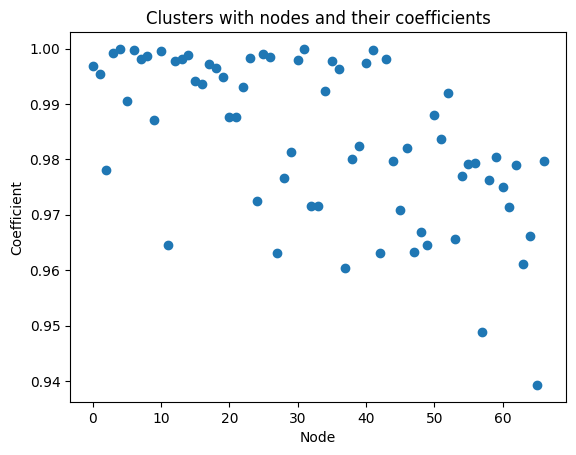

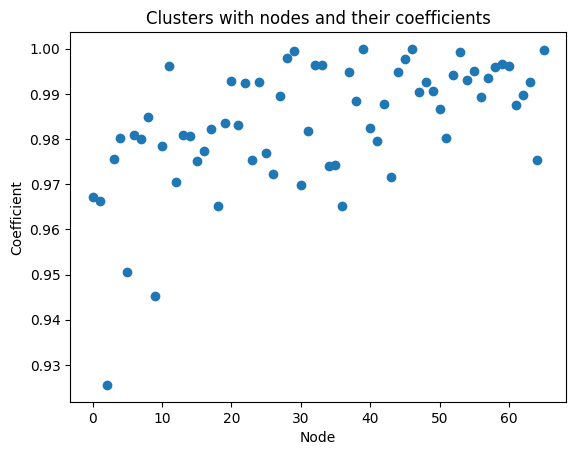

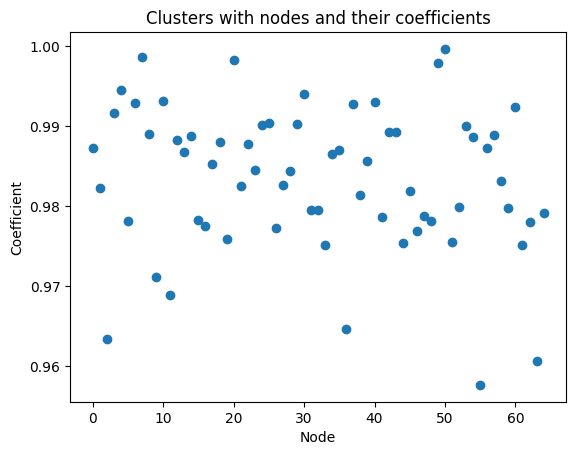

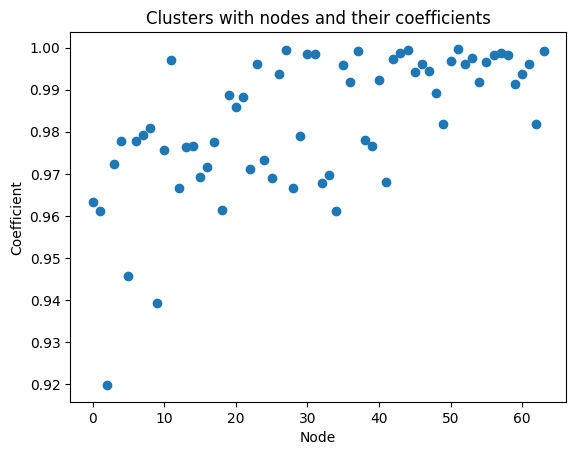

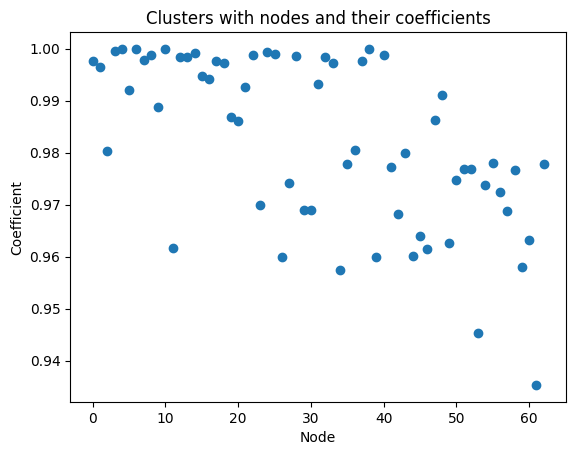

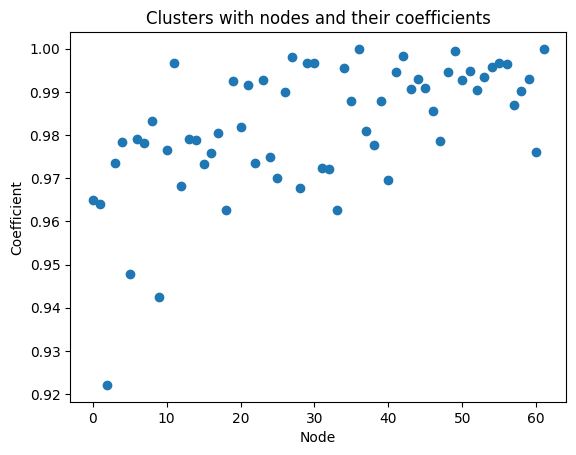

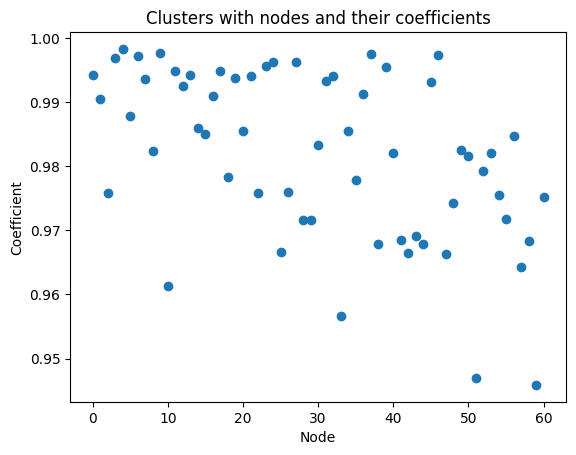

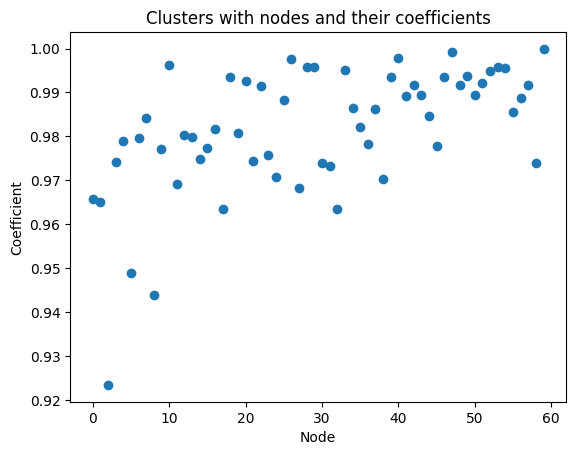

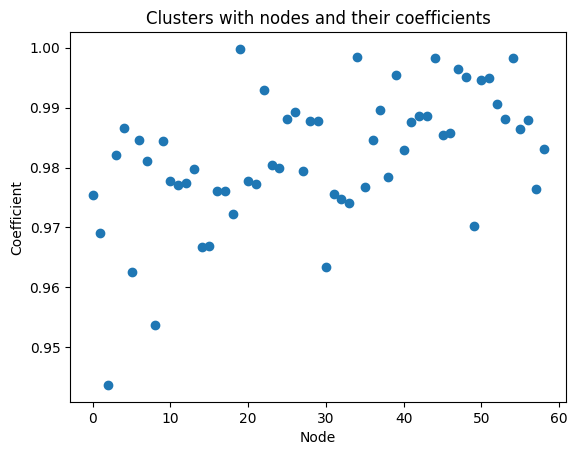

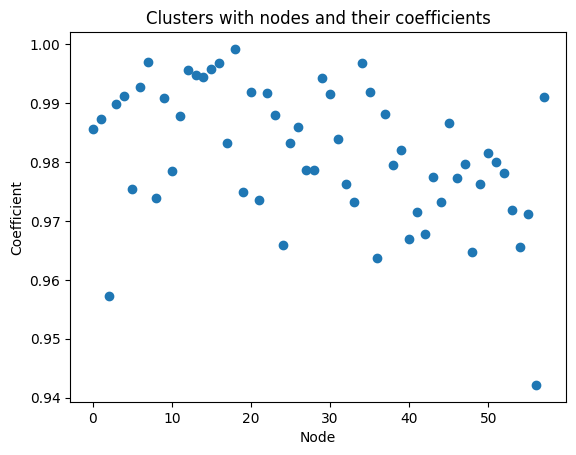

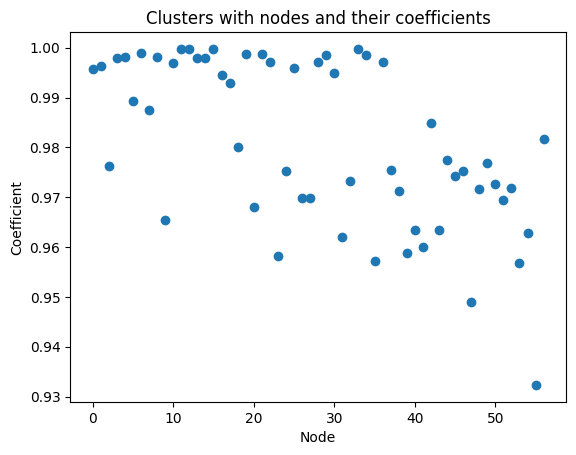

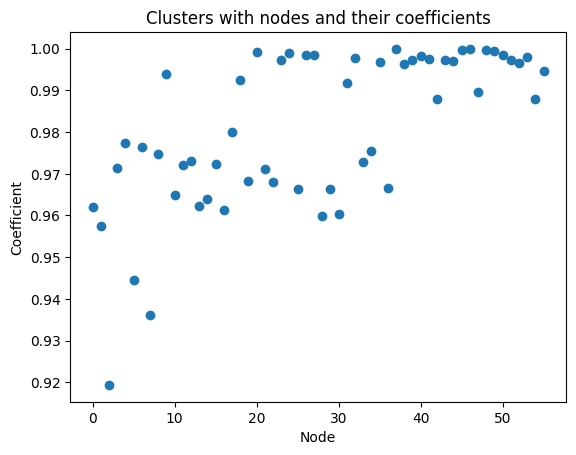

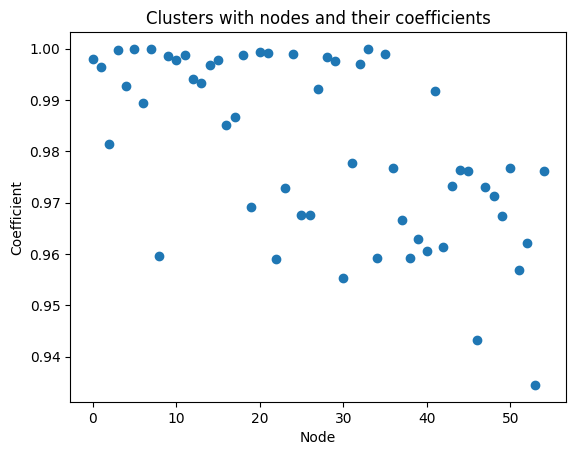

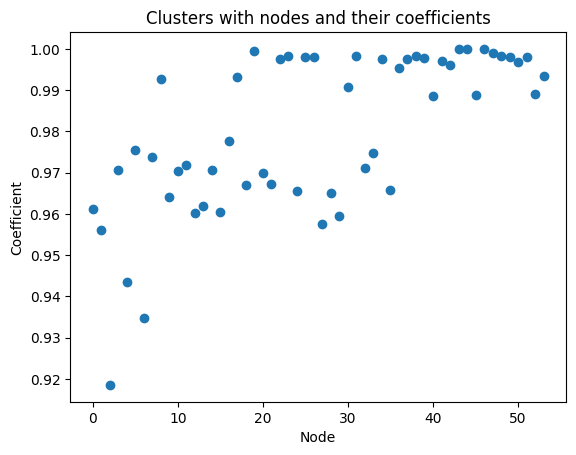

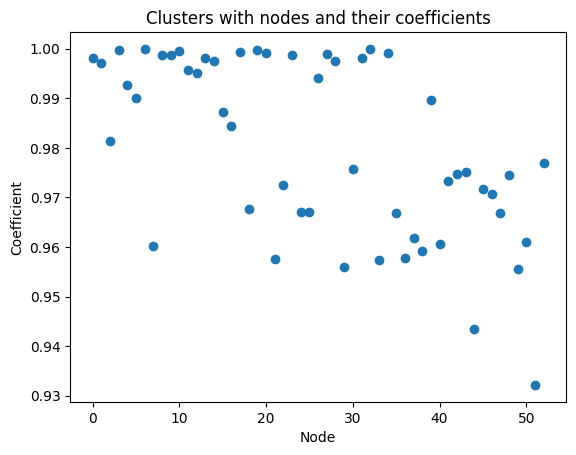

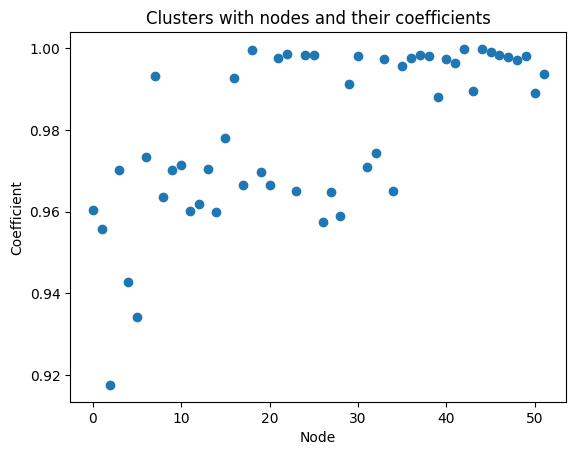

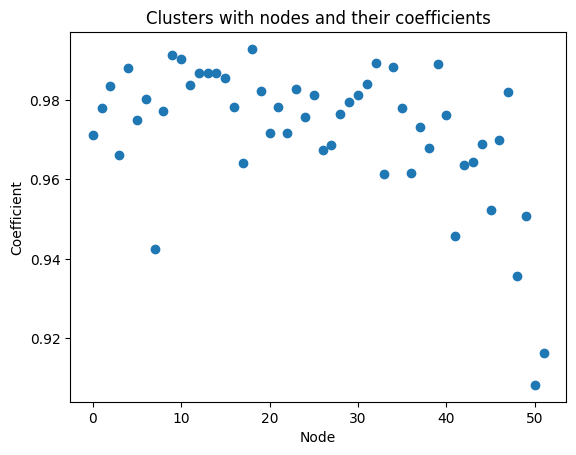

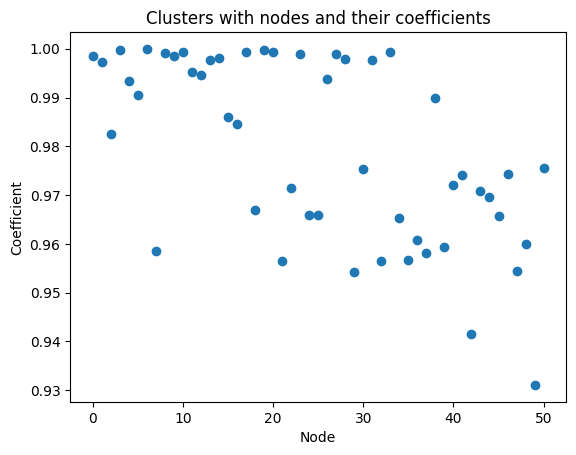

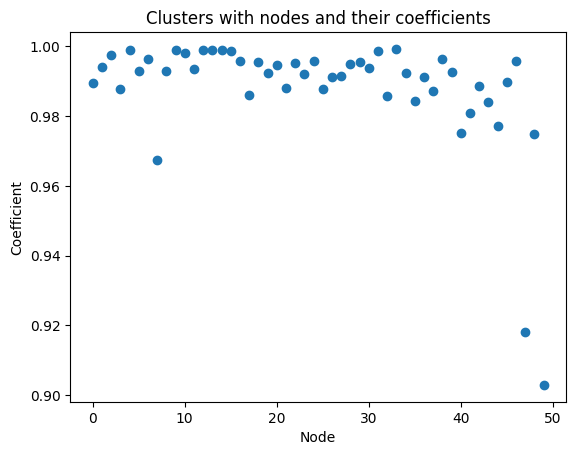

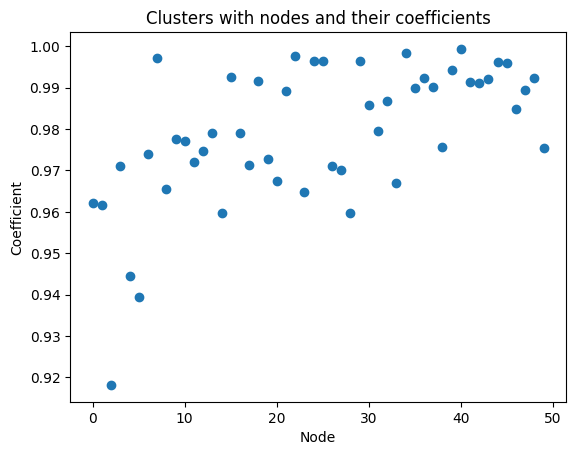

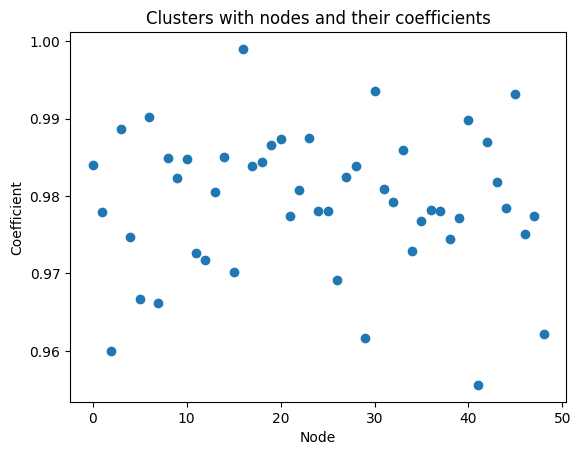

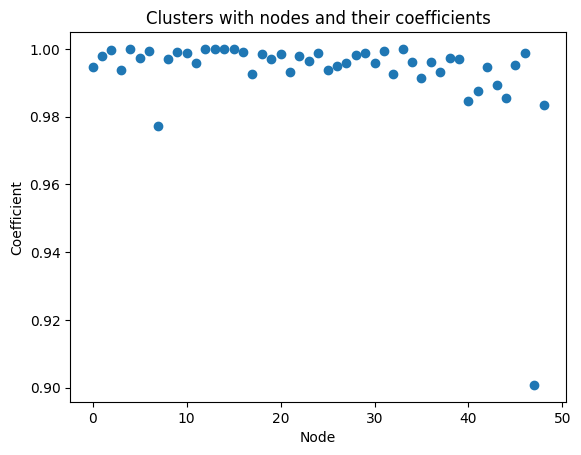

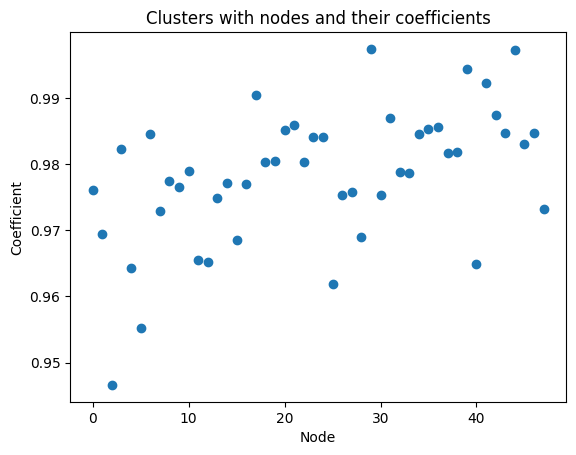

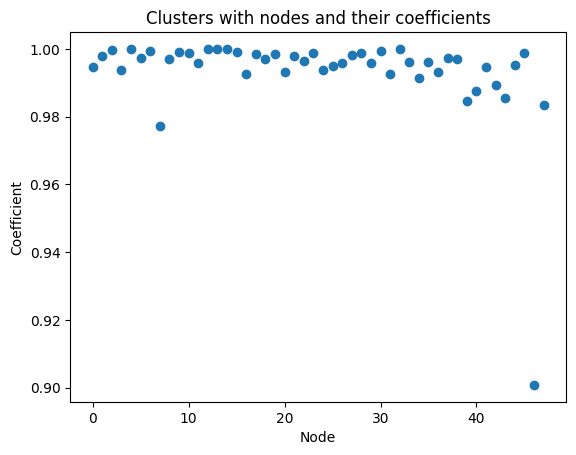

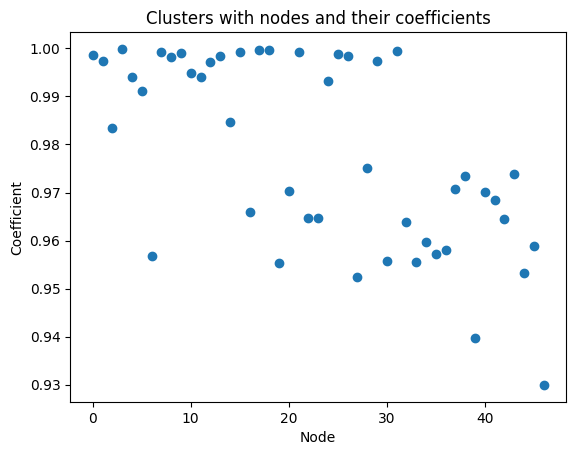

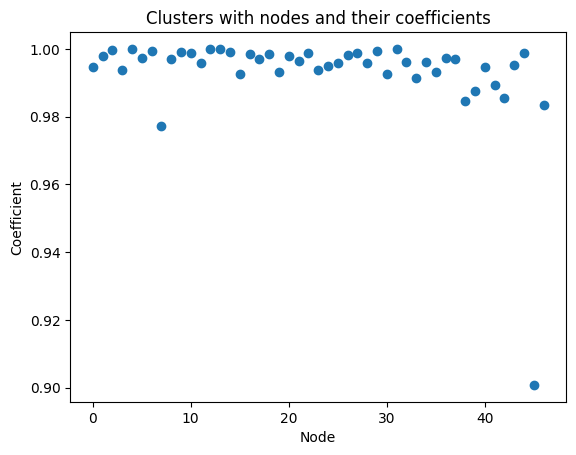

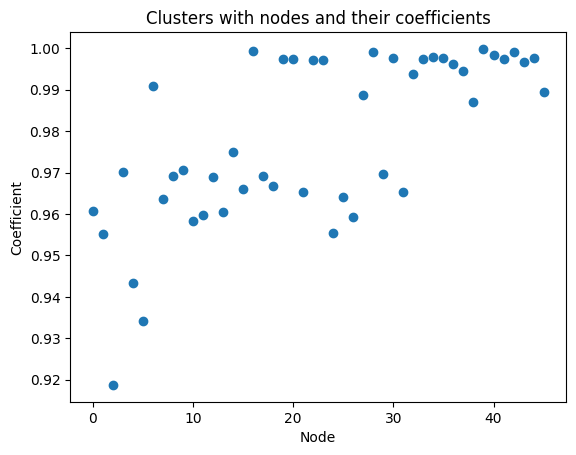

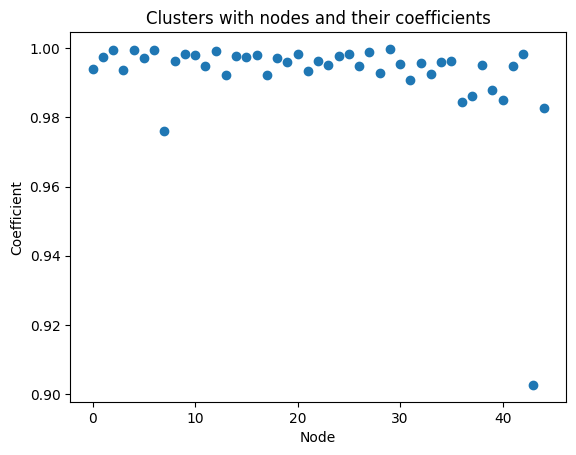

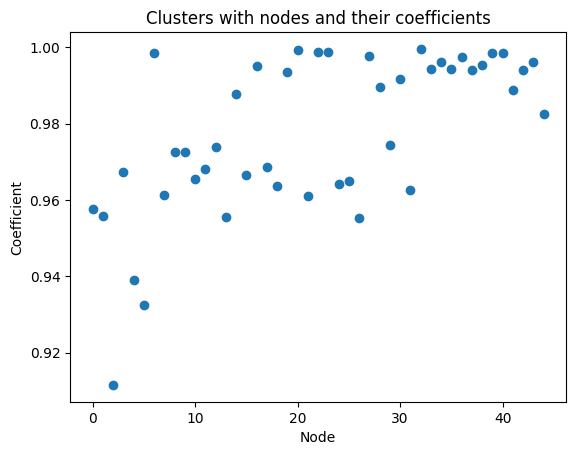

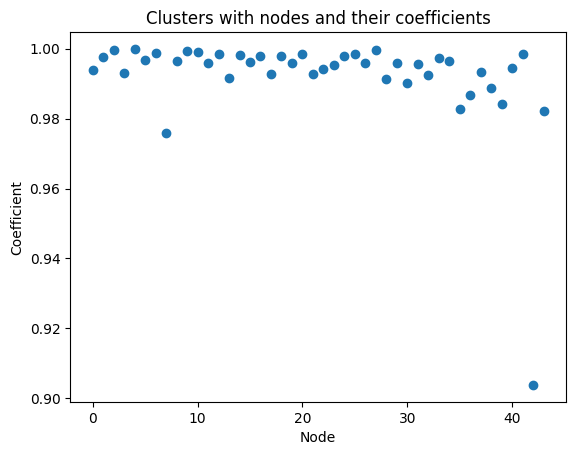

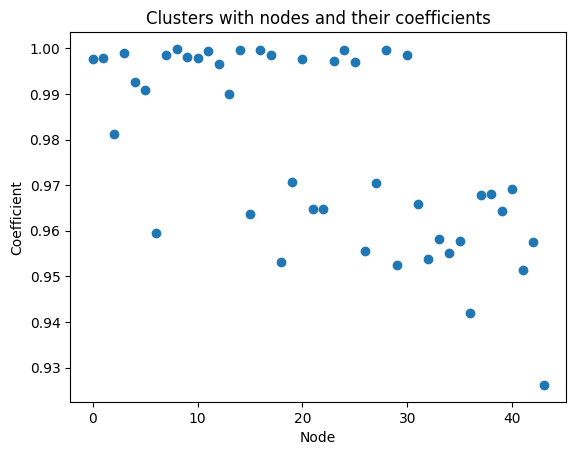

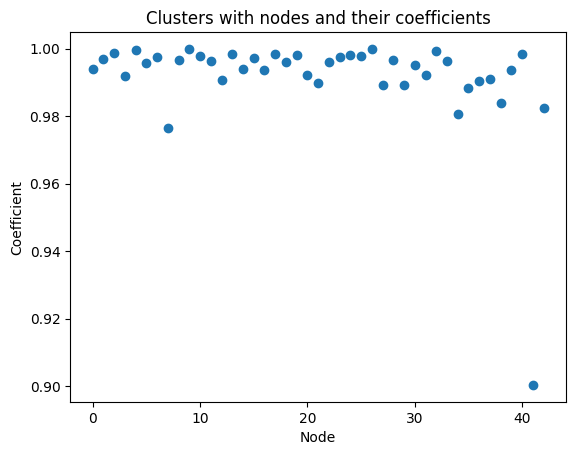

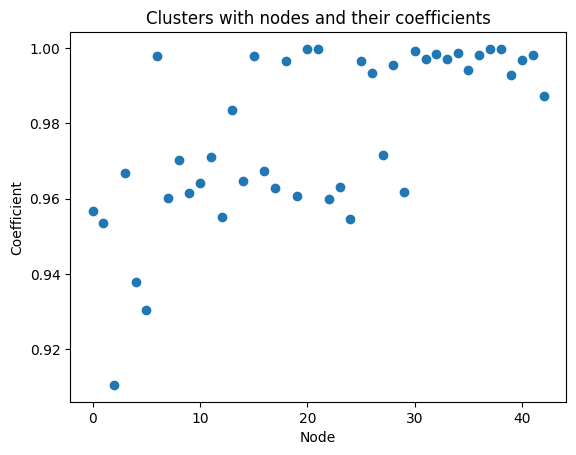

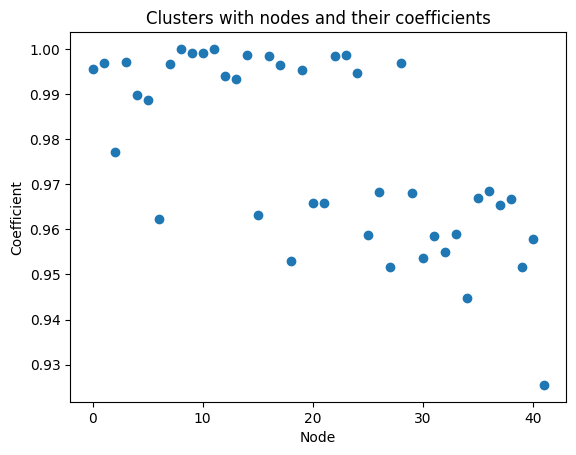

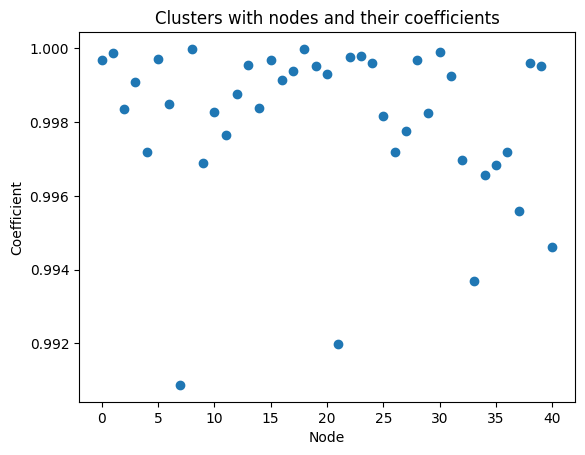

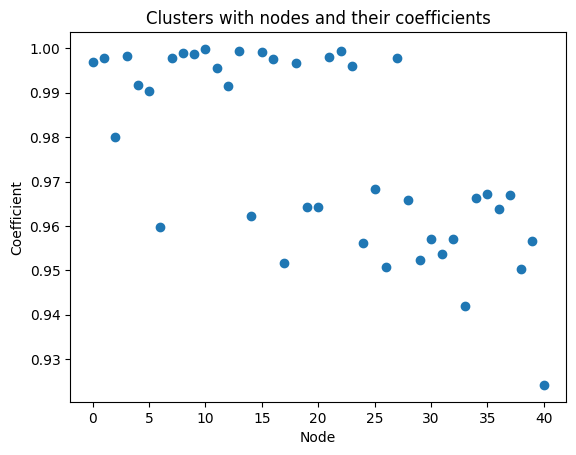

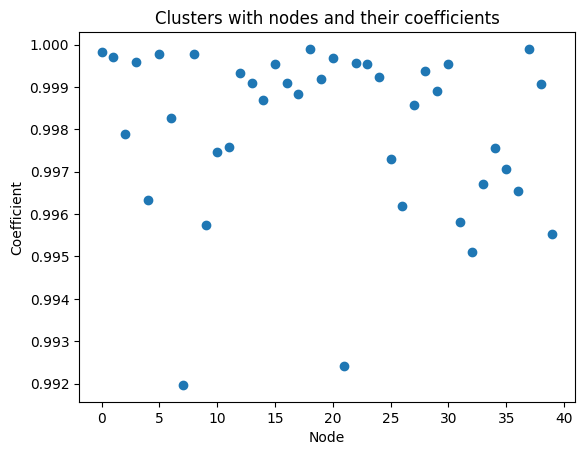

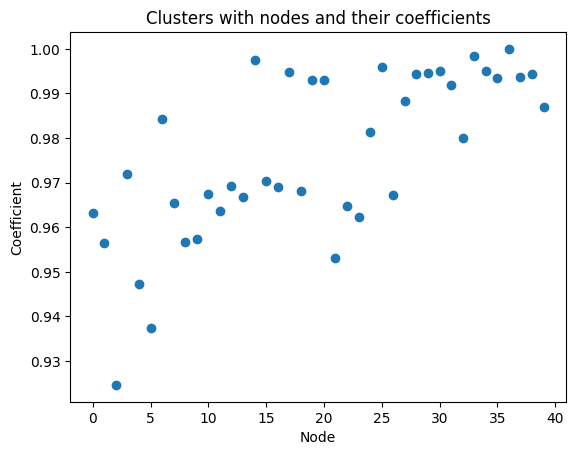

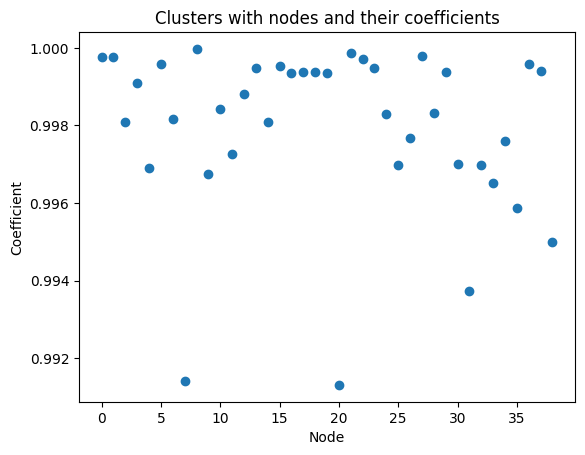

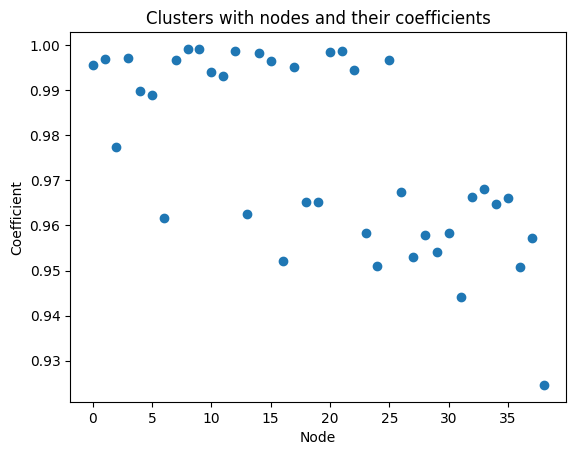

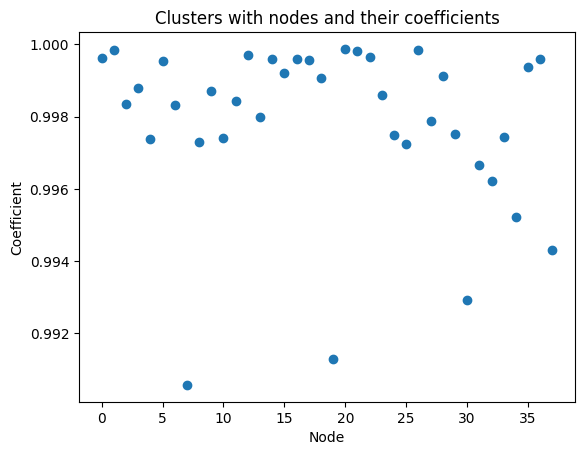

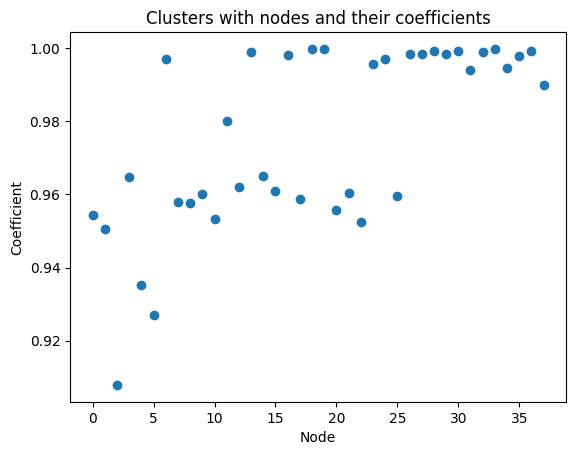

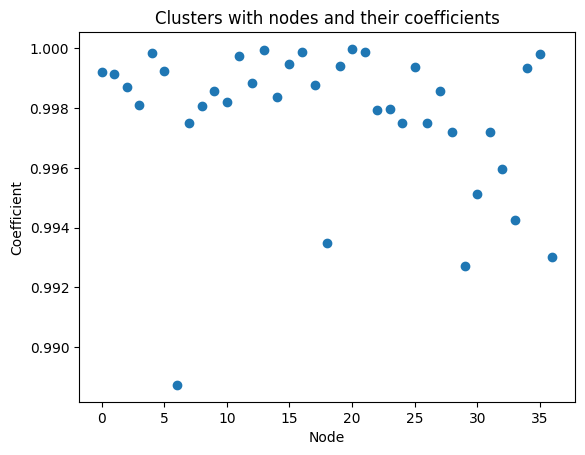

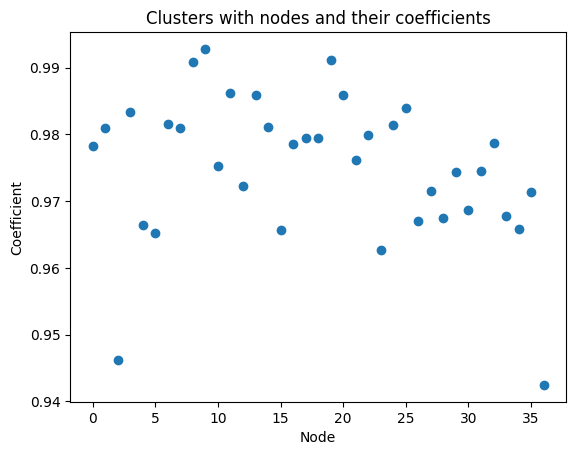

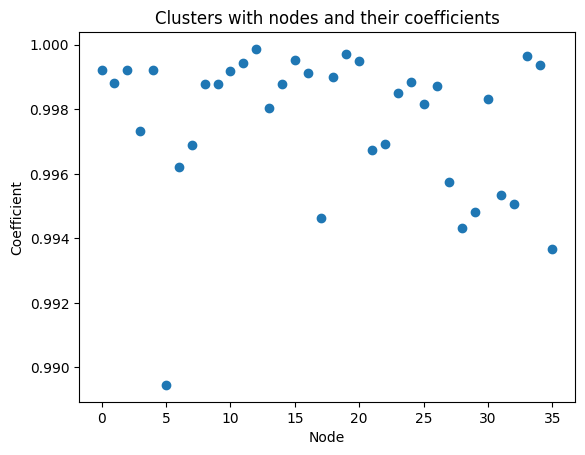

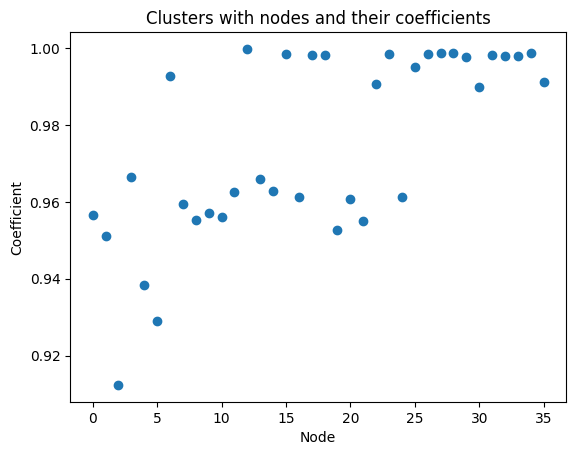

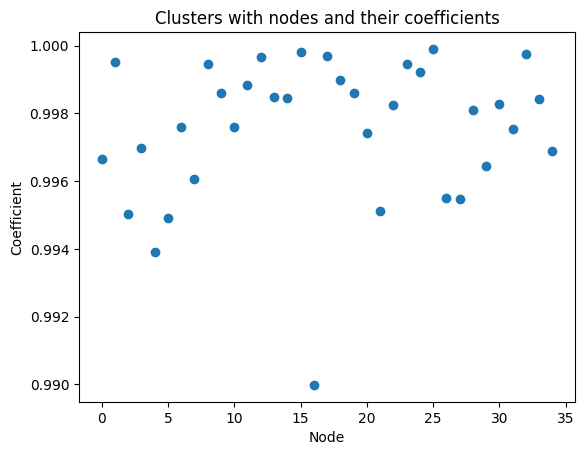

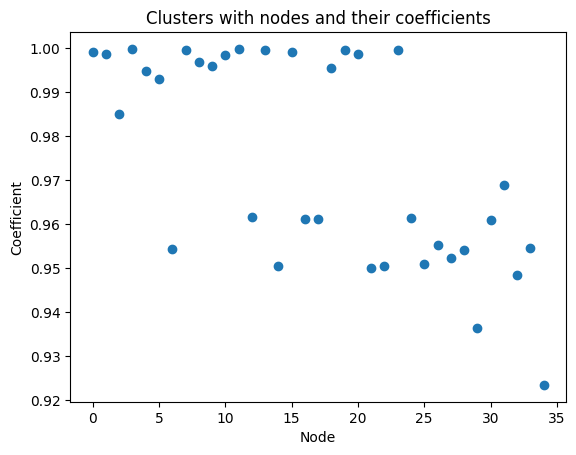

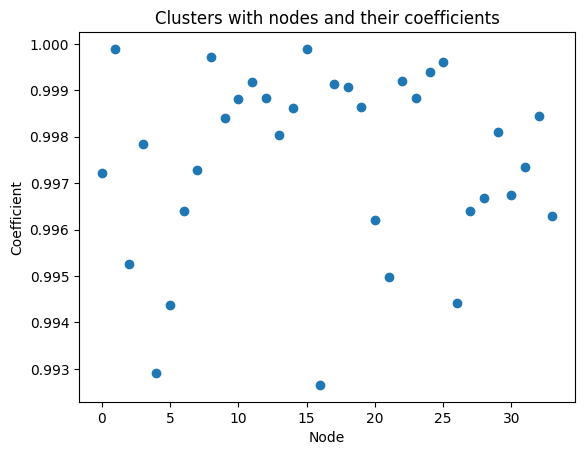

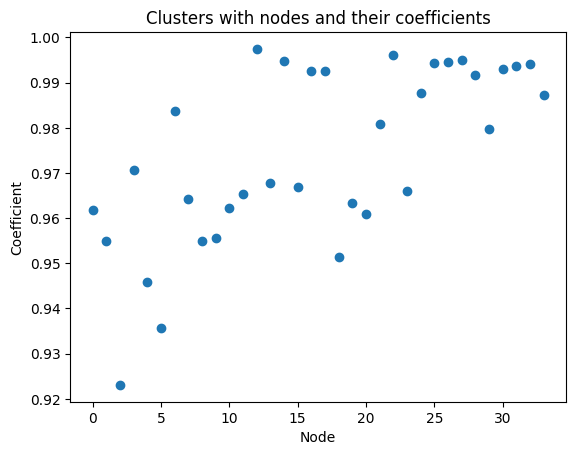

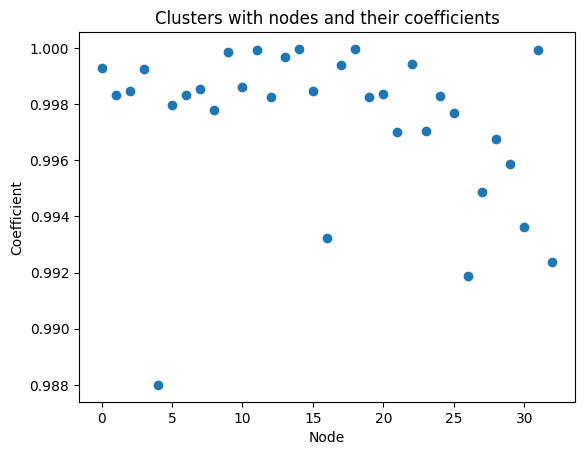

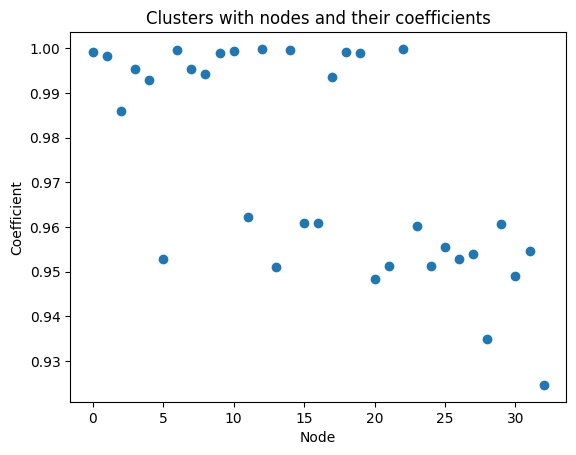

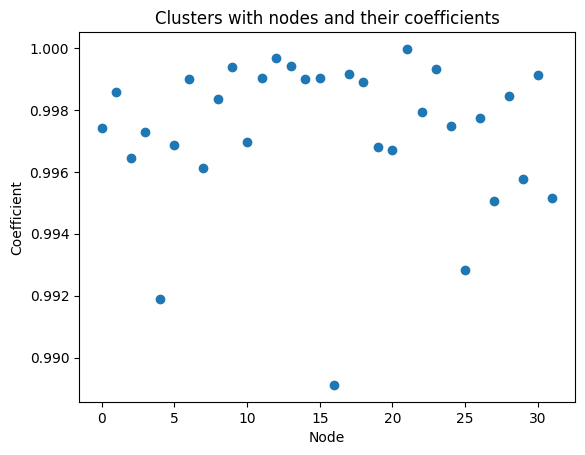

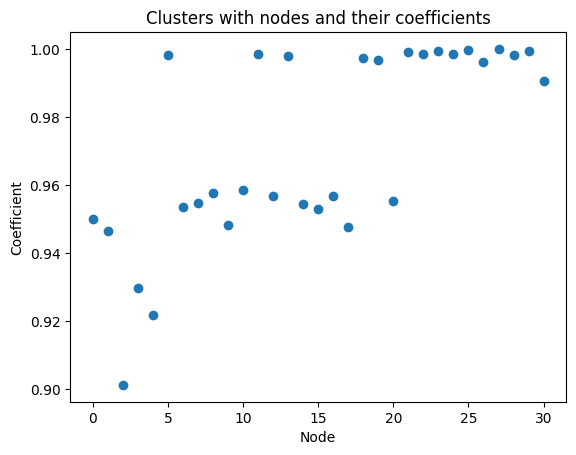

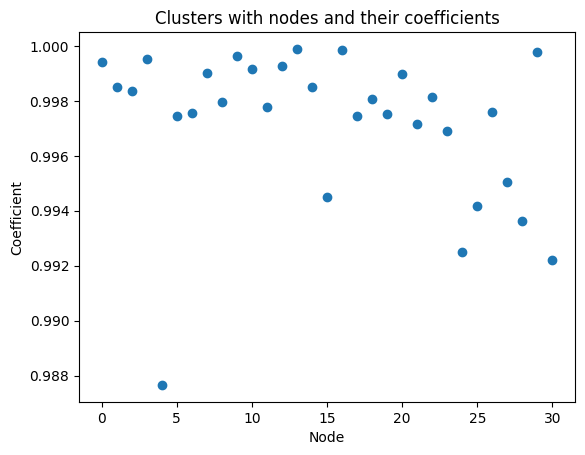

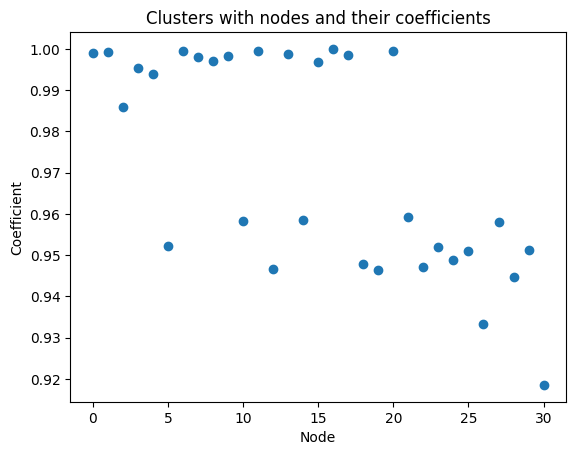

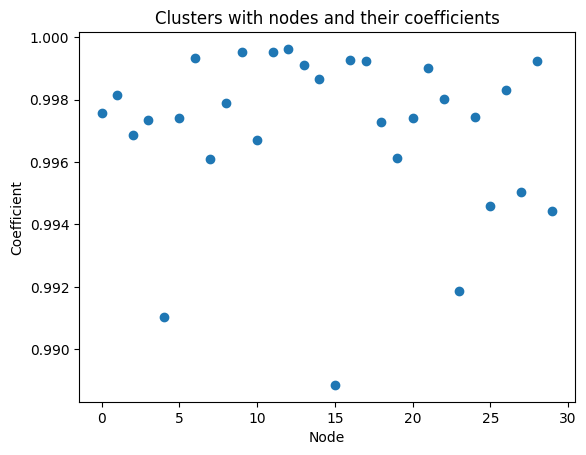

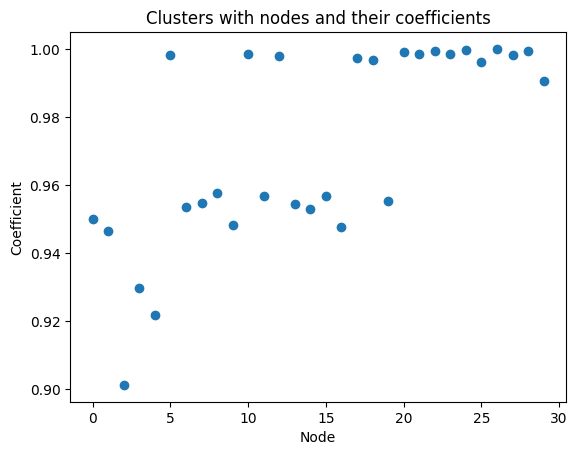

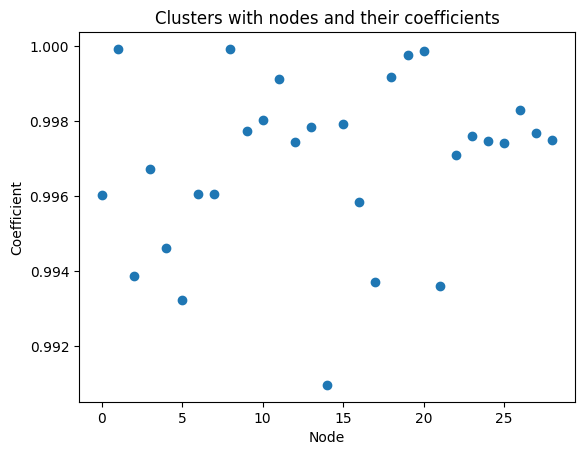

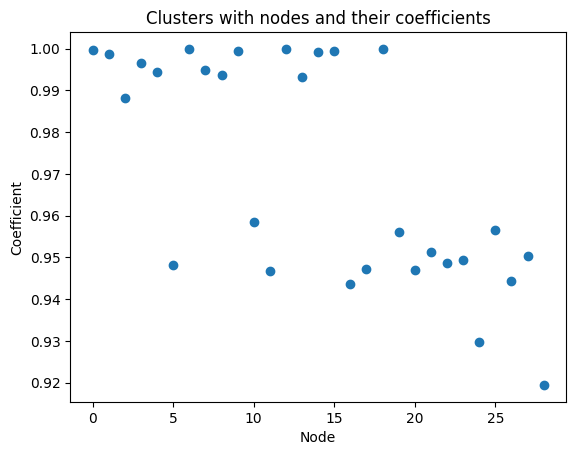

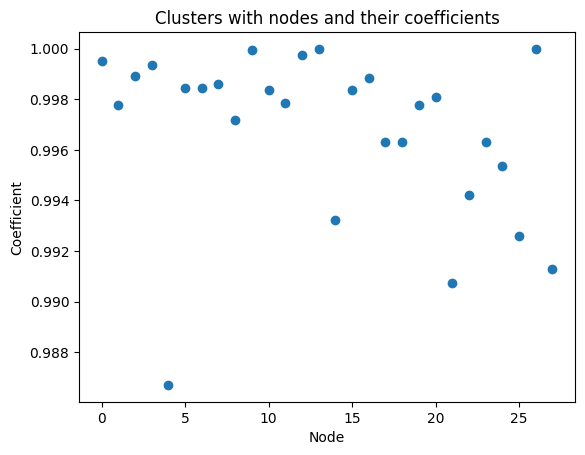

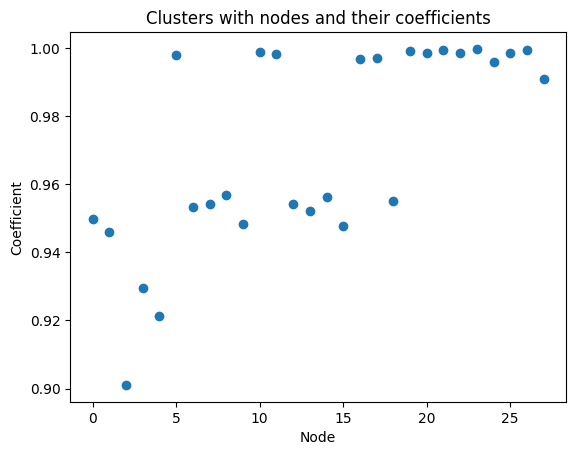

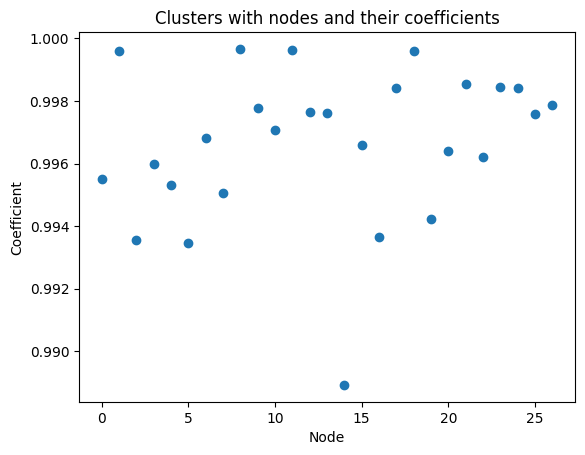

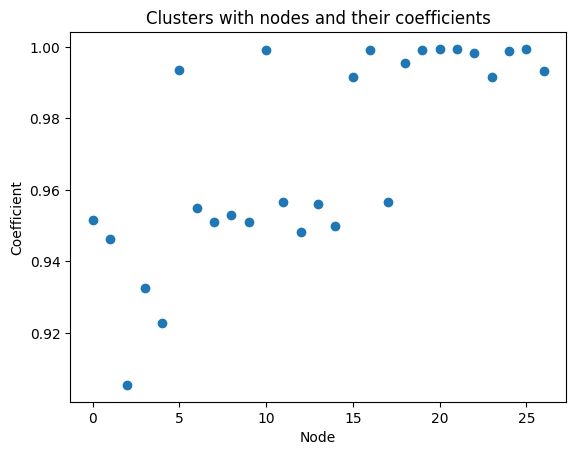

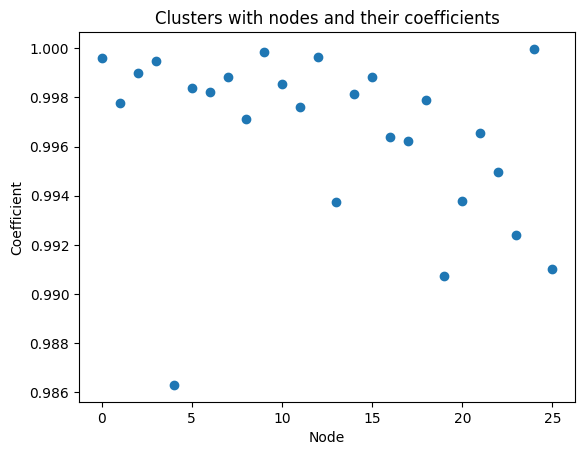

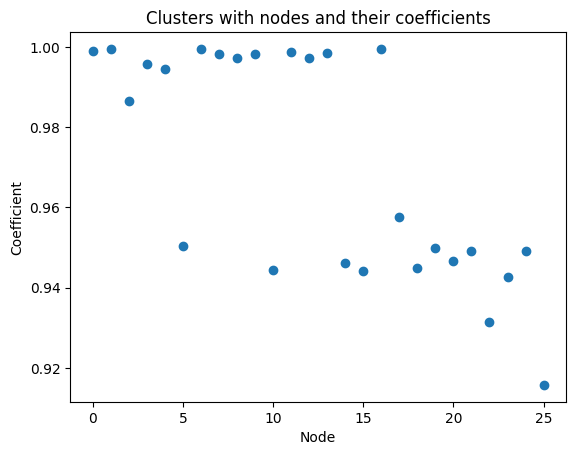

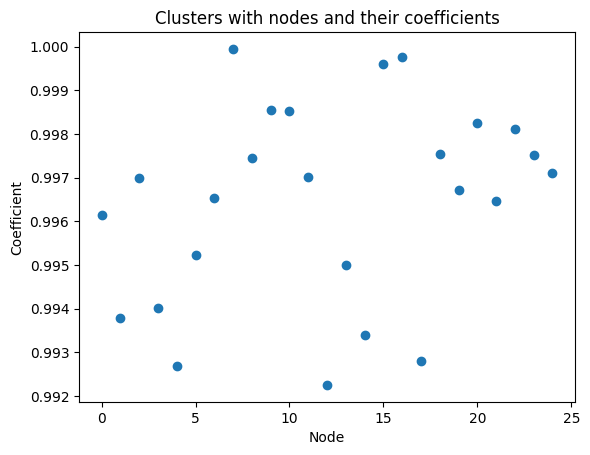

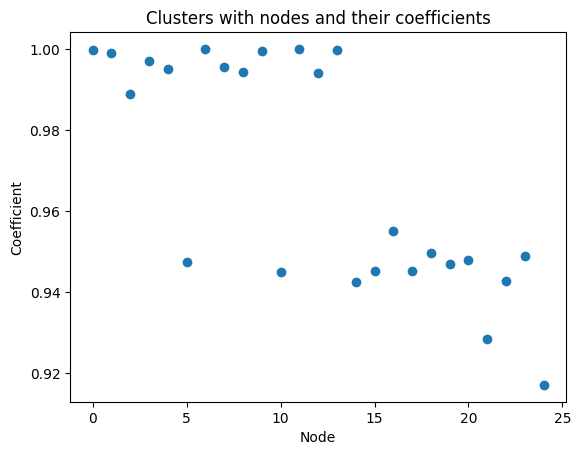

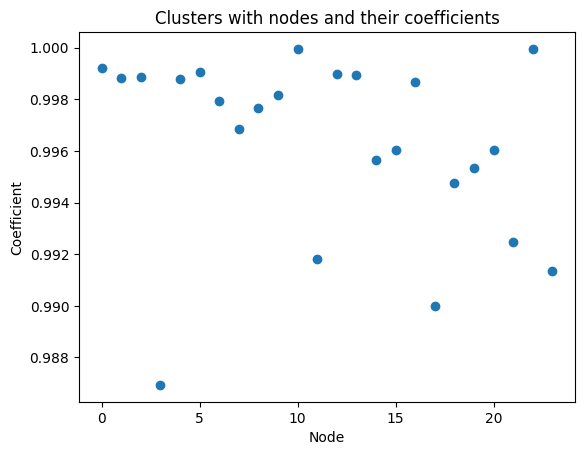

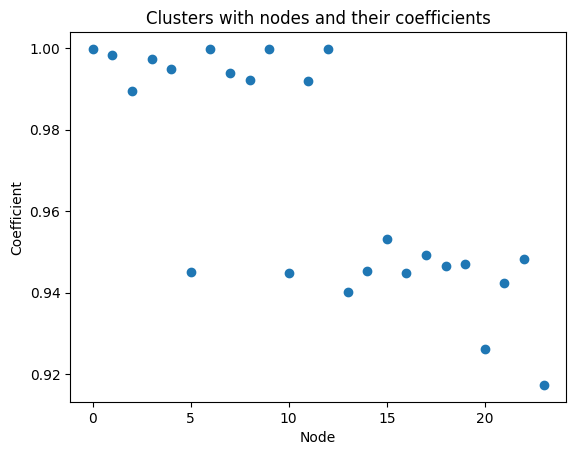

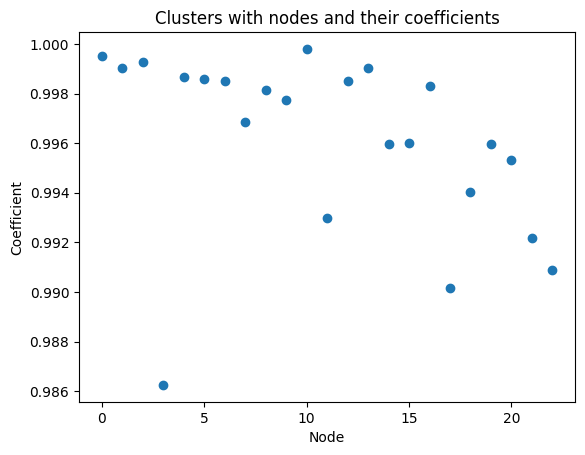

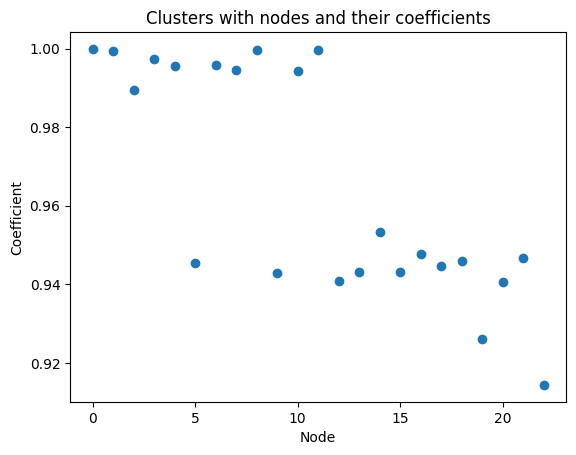

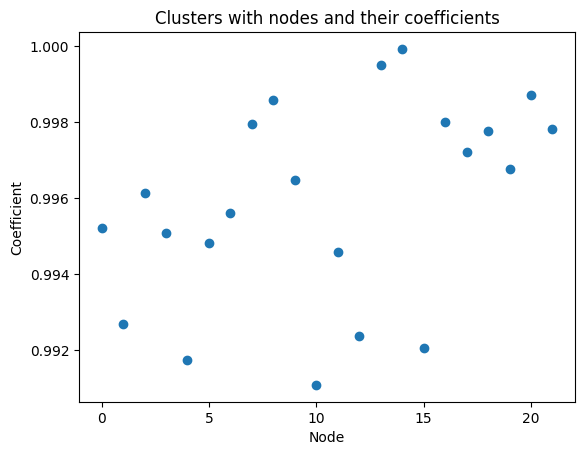

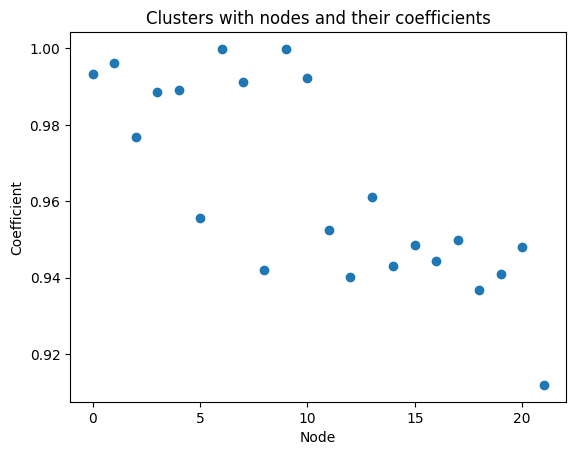

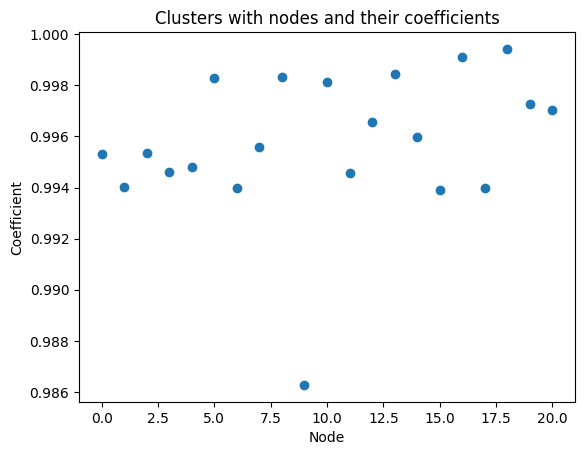

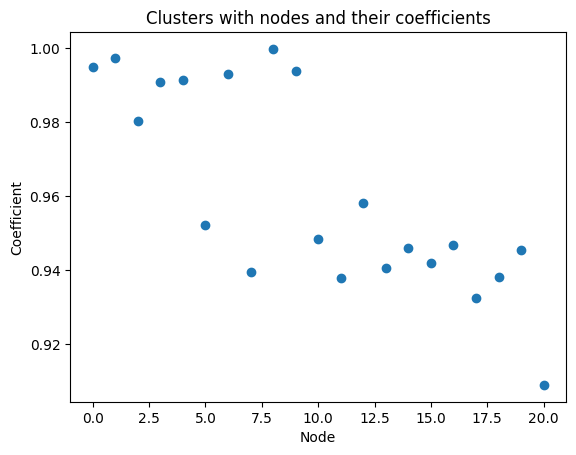

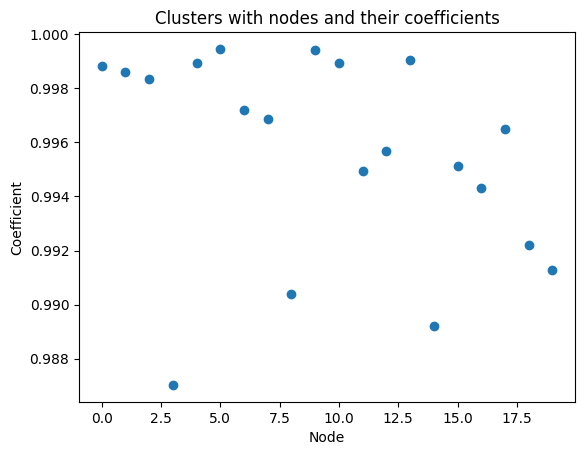

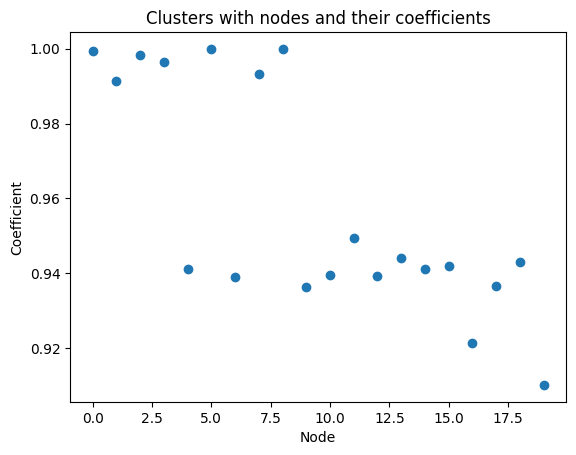

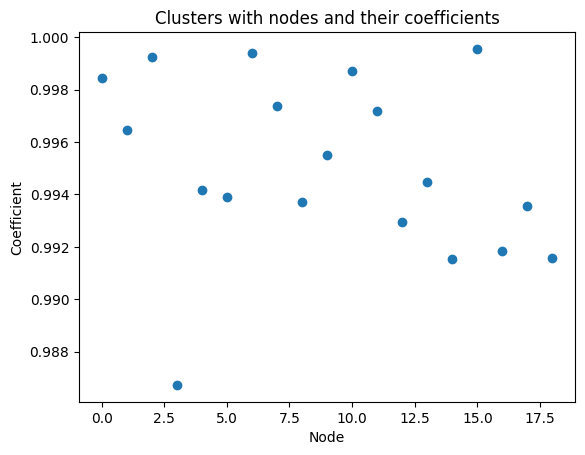

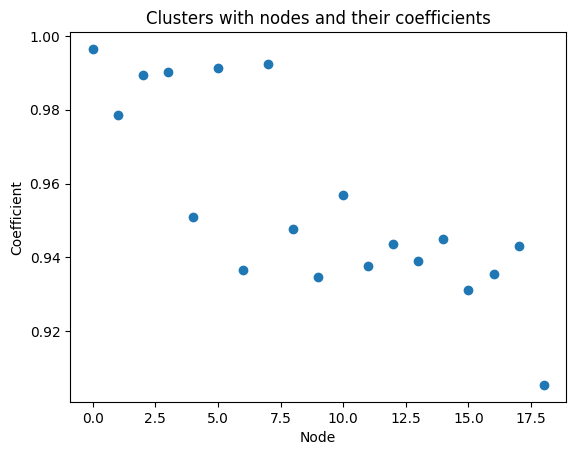

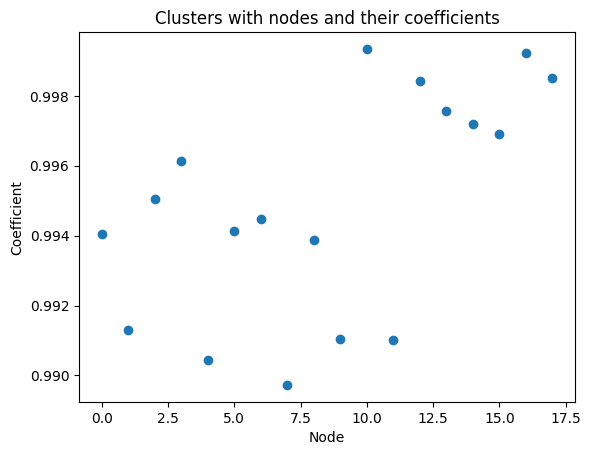

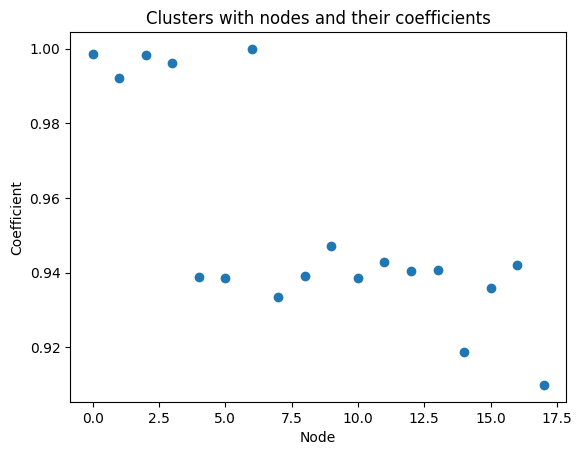

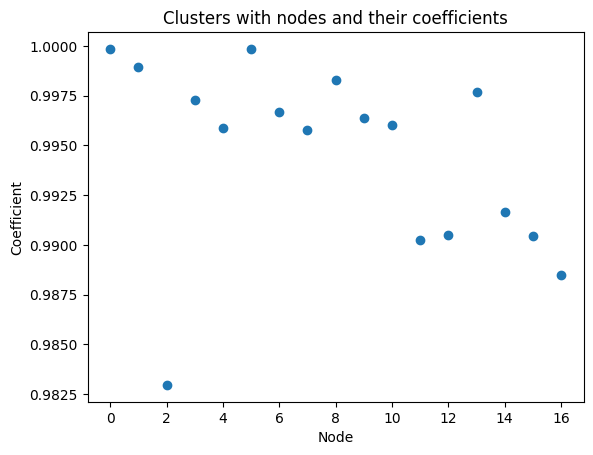

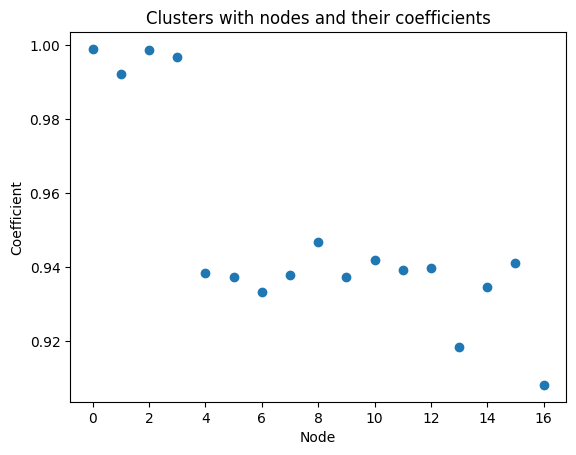

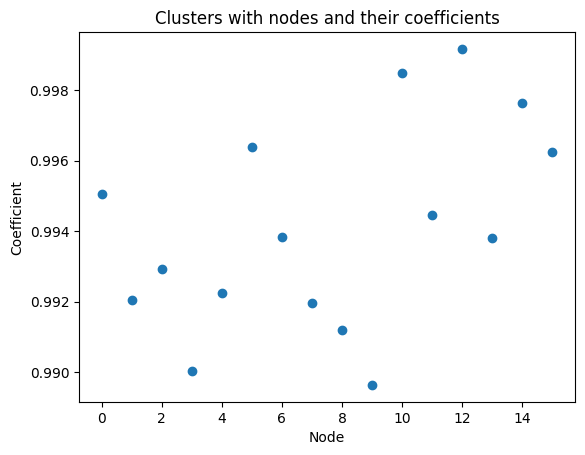

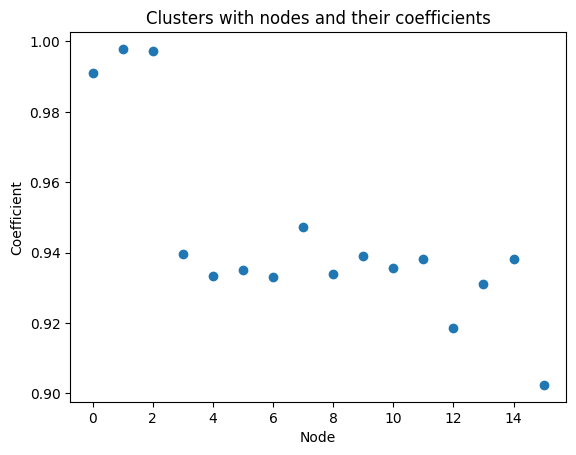

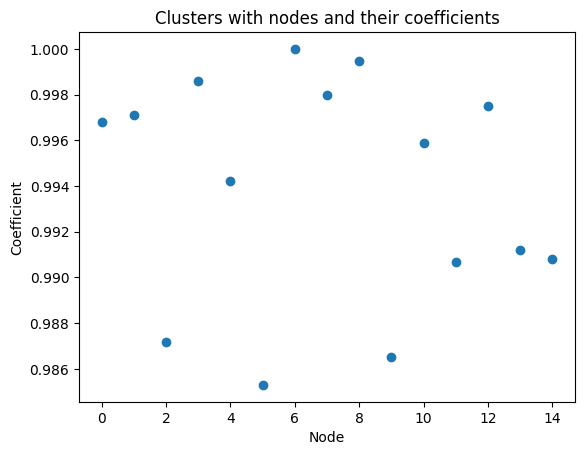

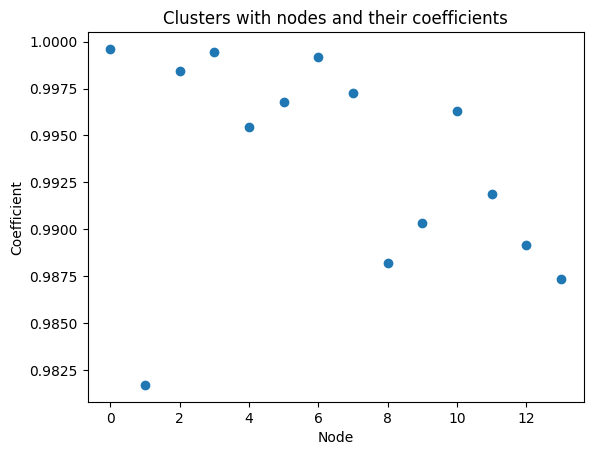

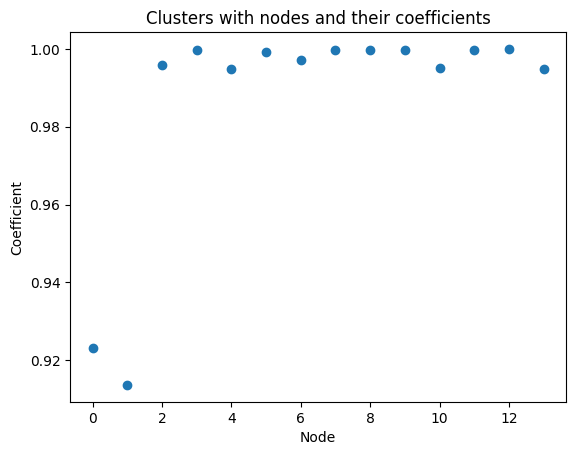

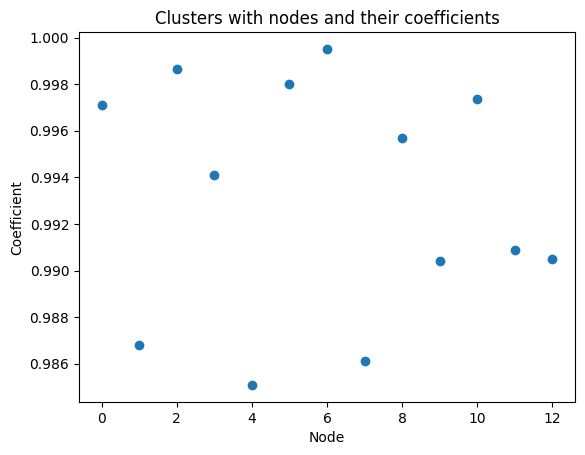

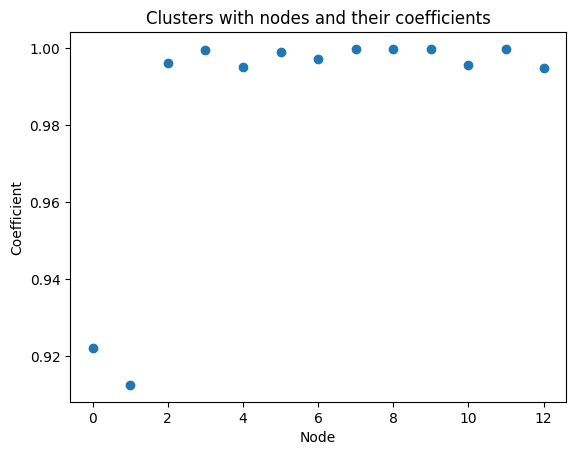

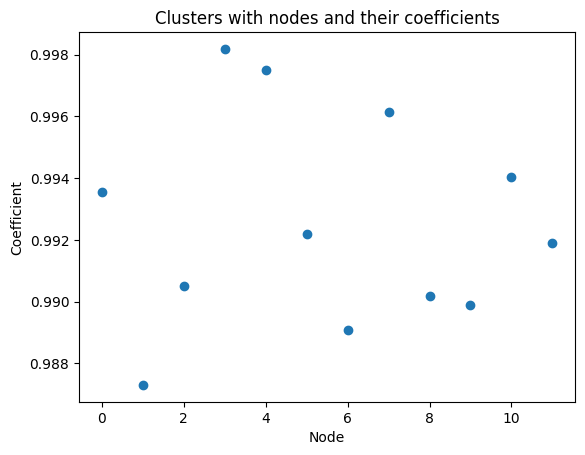

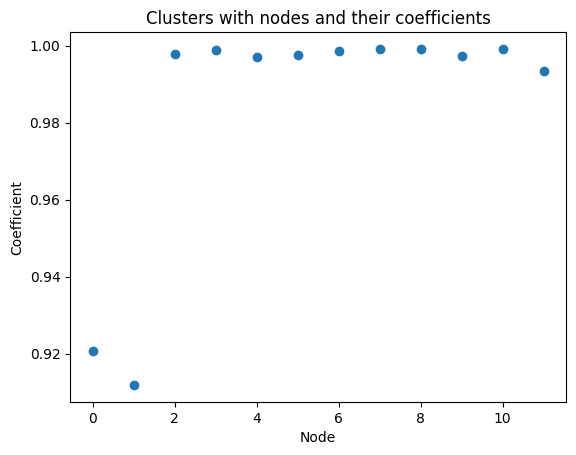

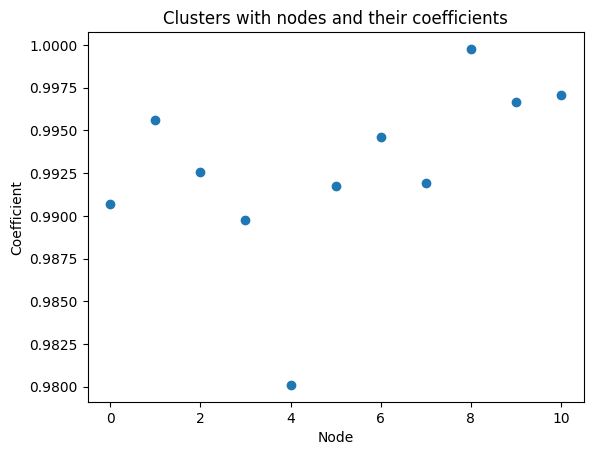

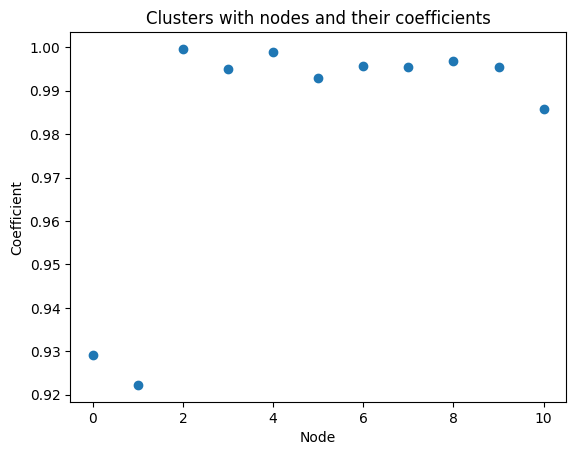

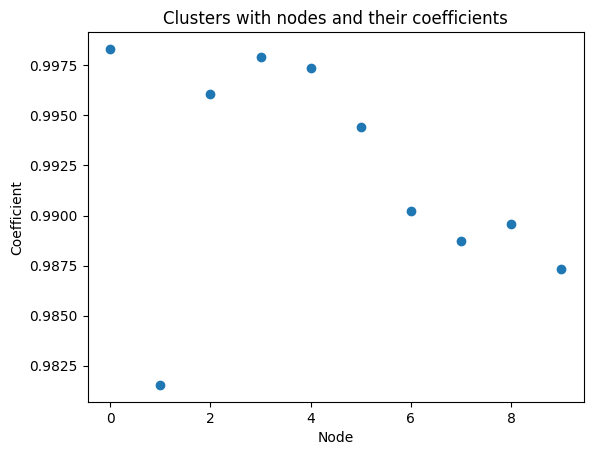

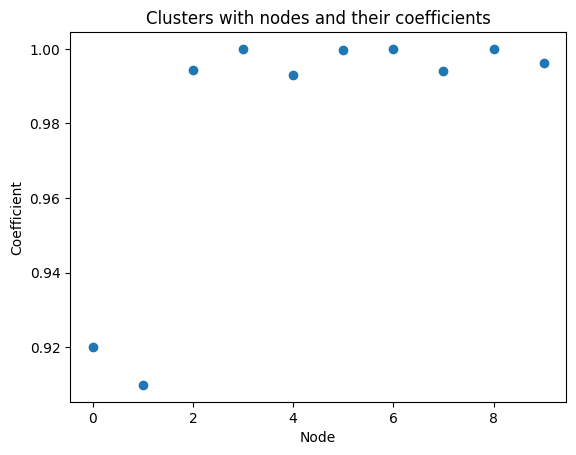

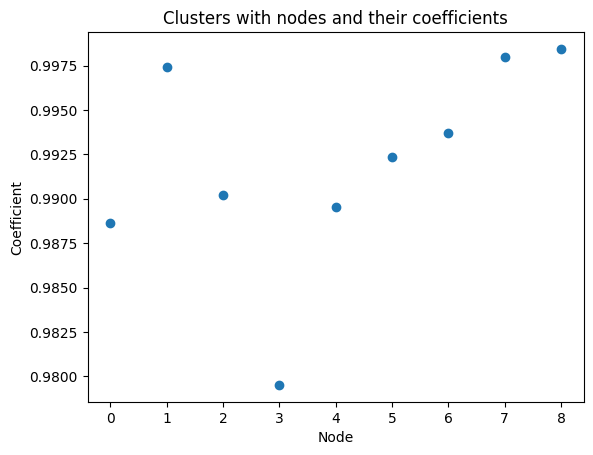

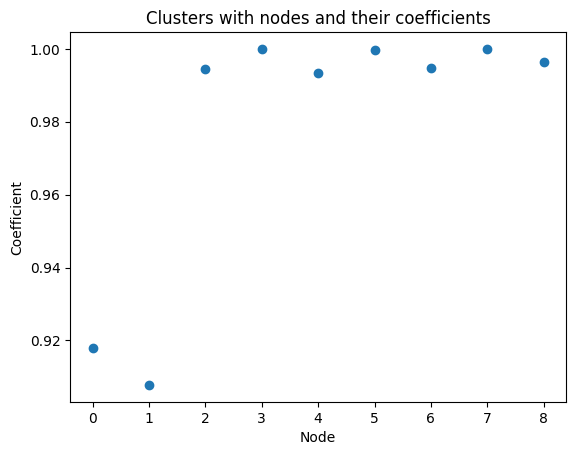

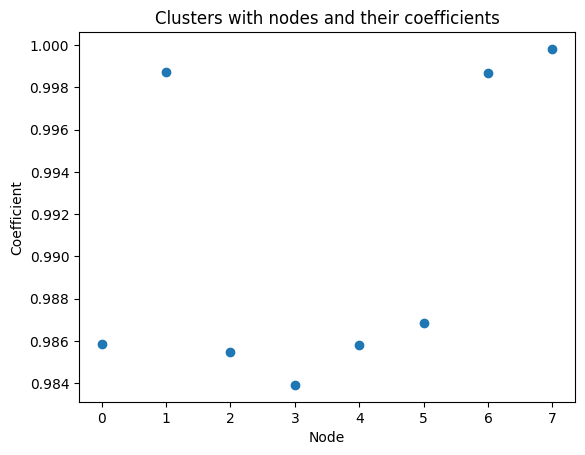

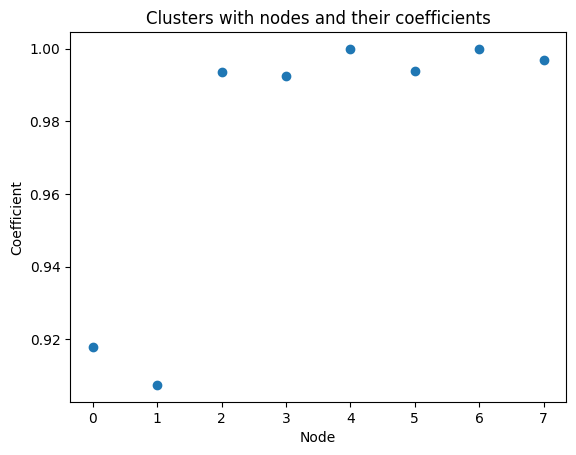

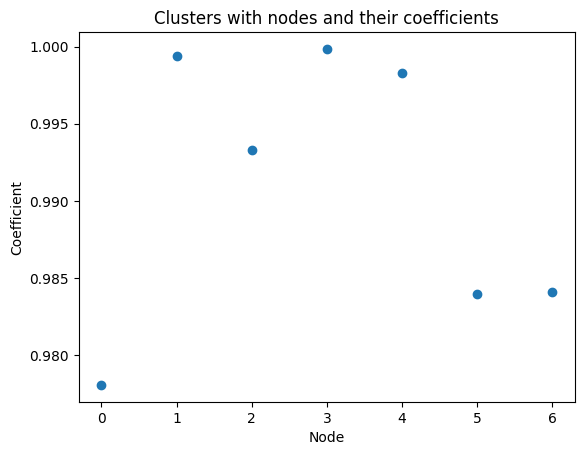

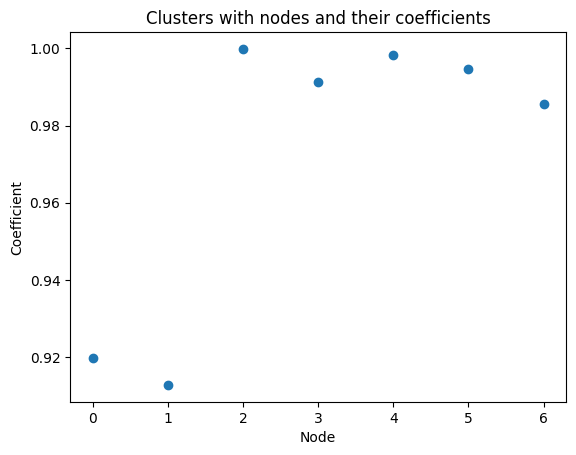

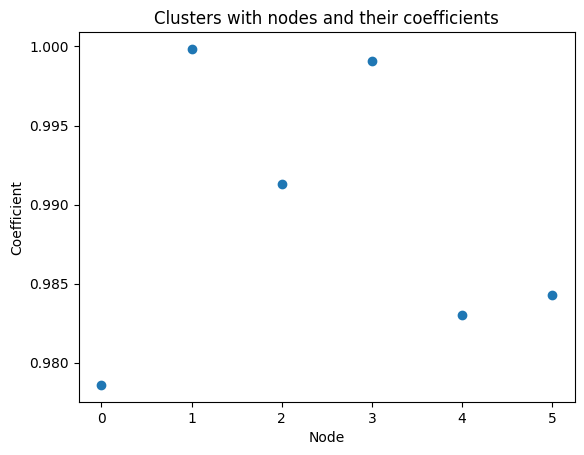

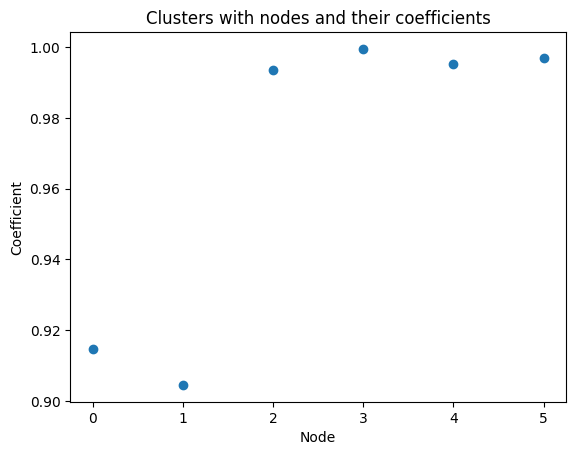

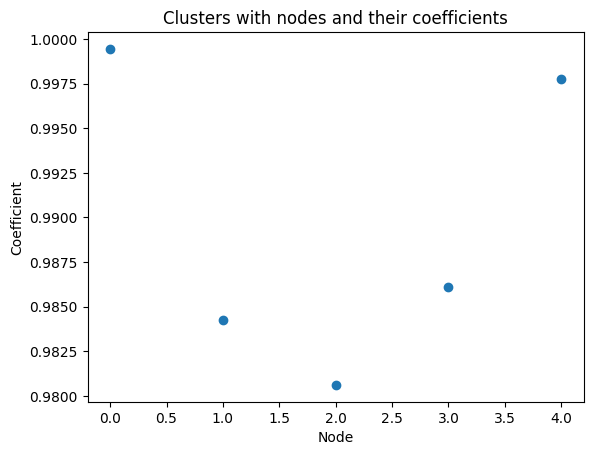

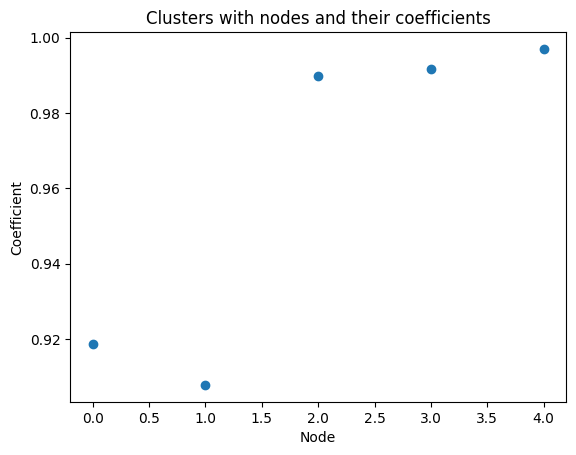

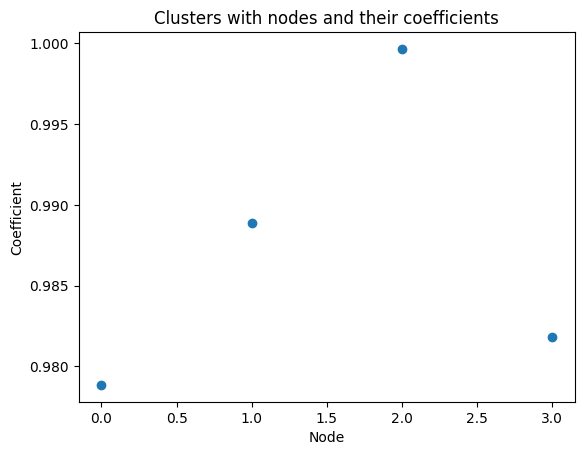

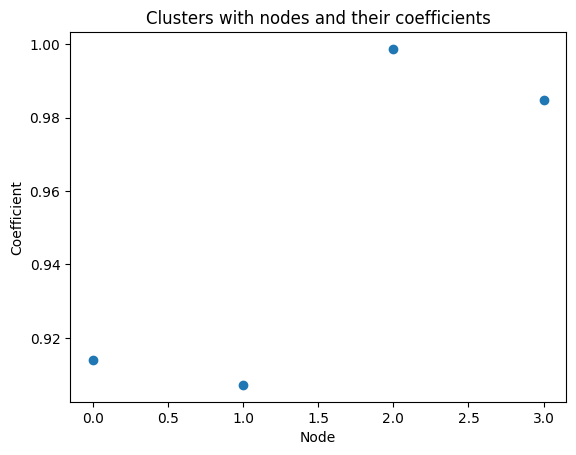

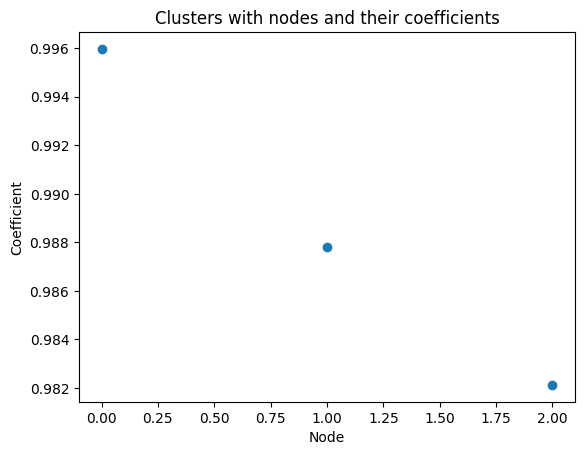

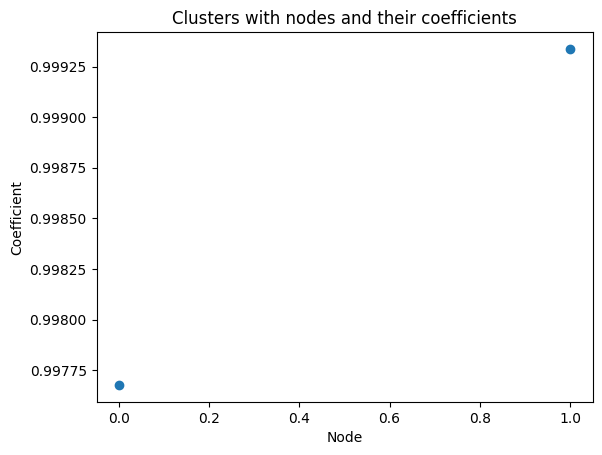

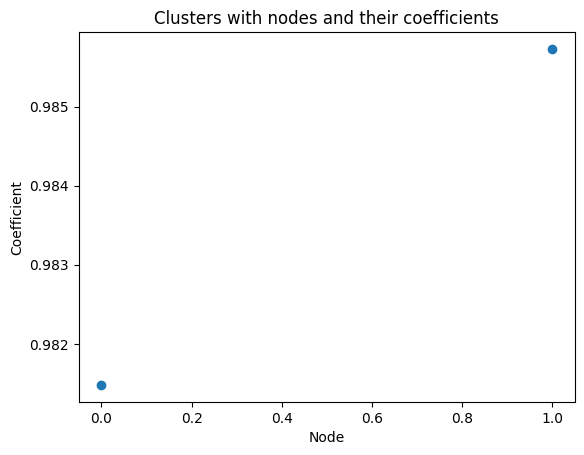

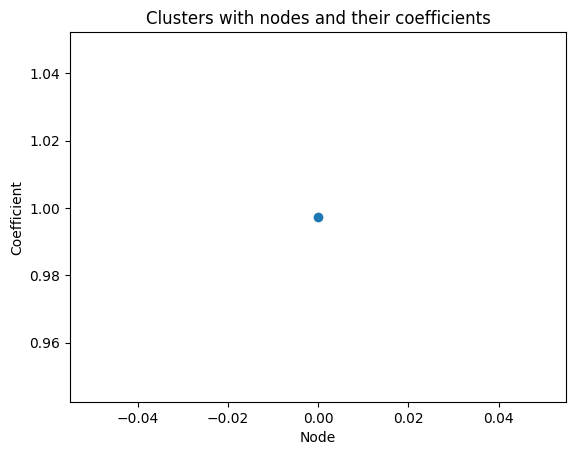

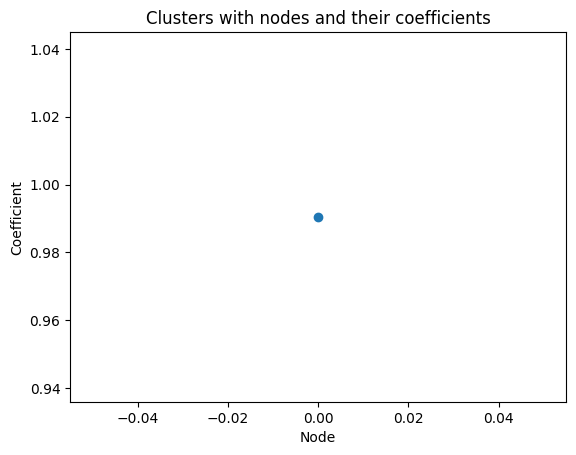

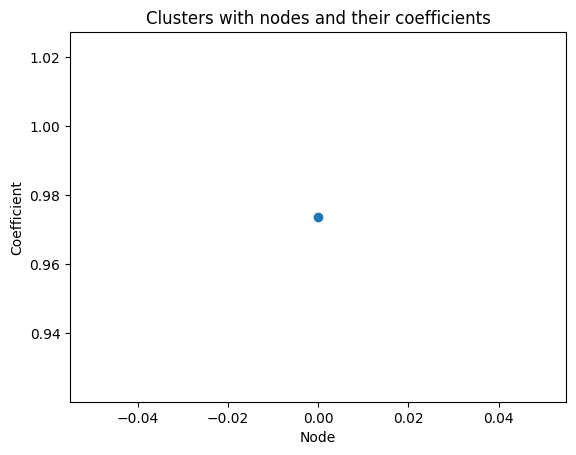

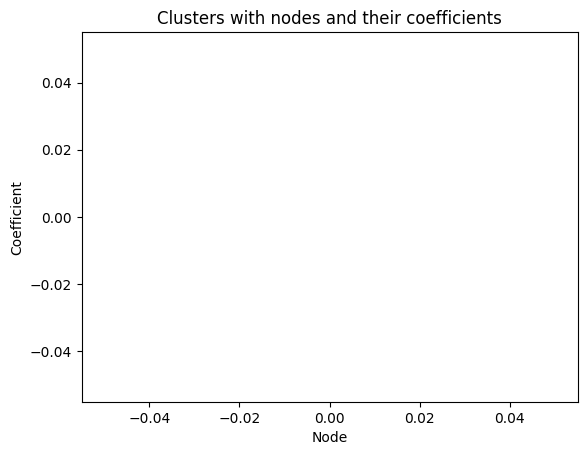

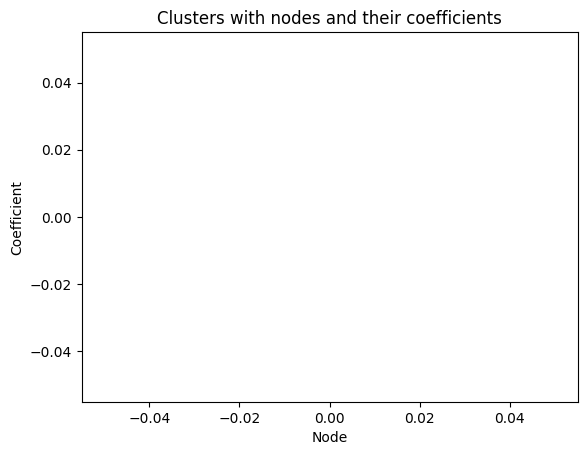

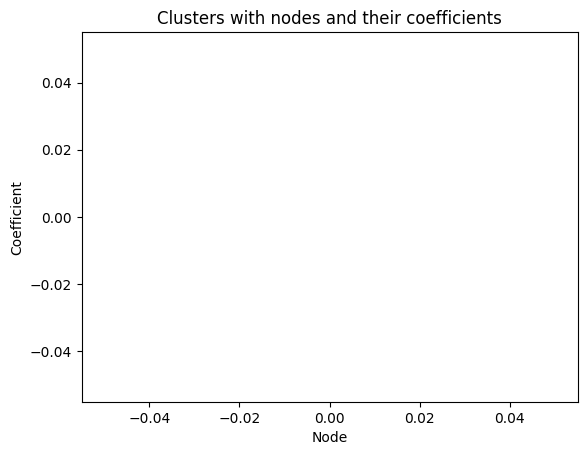

In [338]:
#Loop through the graph until no clusters are left
while(correlation_matrix_permuted.size > 0):
    
    #Calculate weights for each node    
    weighted_graph = []
    for i in correlation_matrix_permuted:
        weighted_graph.append(np.sum(i))

    #Find the node with the highest weight
    max_index = weighted_graph.index(max(weighted_graph))
    max_node = correlation_matrix_permuted[max_index]
    
    #Find all the neighbours
    neighbours = []
    for i in range(0, len(max_node)):
        if(max_node[i] > 0 and max_node[i] != 1):
            neighbours.append(max_node[i])

    #Visualize the cluster
    fig, ax = plt.subplots()
    ax.scatter(range(len(neighbours)), neighbours)
    plt.xlabel("Node")
    plt.ylabel("Coefficient")
    plt.title("Clusters with nodes and their coefficients")
    plt.show()

    #Remove the node from the correlation matrix
    correlation_matrix_permuted = np.delete(np.delete(correlation_matrix_permuted, max_index, axis=0), max_index, axis=1)